In [1]:
import os
os.chdir("../")

overwrite = False
dataset_name = 'syn_gt'
attr_suffix = '_at'
suffix = '_self_8_100' 
open_vocab = True

# Data

In [2]:
with open('run/settings.py', 'r') as file:
    exec(file.read())
with open('run/data.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu
syn_gt_at_self_8_100
syn_gt_at_self_8_100
{'No trend.': (210, 60, 30), 'The time series shows upward linear trend.': (210, 60, 30), 'The time series shows downward linear trend.': (210, 60, 30), 'The time series shows upward quadratic trend.': (210, 60, 30), 'The time series shows downward quadratic trend.': (210, 60, 30), 'No seasonal pattern.': (210, 60, 30), 'The time series exhibits a seasonal pattern.': (210, 60, 30), 'No sharp shifts.': (210, 60, 30), 'The mean of the time series shifts upwards.': (210, 60, 30), 'The mean of the time series shifts downwards.': (210, 60, 30), 'The time series exhibits low variability.': (210, 60, 30), 'The time series exhibits high variability.': (210, 60, 30)}


final distribution of text prediction
text
No trend. No seasonal pattern. No sharp shifts. The time series exhibits low variability.                                                                                                210
No trend. No se

# Model (customizable)

In [3]:
with open('run/model.py', 'r') as file:
    exec(file.read())

syn_gt_at_self_8_100
/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns/script/VITAL/results/syn_gt_at_self_8_100
syn_gt_at_self_8_100
syn_gt_at_self_8_100
Layer (type:depth-idx)                                                 Param #
VITAL                                                                  --
├─TSEncoder: 1-1                                                       --
│    └─LocalNorm: 2-1                                                  --
│    └─PatchCNNTSEncoder: 2-2                                          --
│    │    └─ModuleList: 3-1                                            1,239,984
│    │    └─LayerNorm: 3-2                                             1,536
├─TextEncoder: 1-2                                                     --
│    └─PatchMLPTextEncoder: 2-3                                        --
│    │    └─ModuleList: 3-3                                            5,327,616
├─TSDecoder: 1-3                            

In [4]:
# with open('run/train_2steps.py', 'r') as file:
#     exec(file.read())

In [5]:
# w = 0.8
# with open('run/eval.py', 'r') as file:
#     exec(file.read())
# with open('run/eng_eval.py', 'r') as file:
#     exec(file.read())

In [6]:
w = 0.8
if 'meta' not in locals():
    meta = None
if 'configs' not in locals():
    configs = None

eval_suffix = '' if meta is not None else str(w) # te / vital
if 'vital_suffix' not in locals():
    vital_suffix = '' # '' for vital model, otherwise for te/tw

if 'output_dir' not in locals():
    output_dir = config_dict['output_dir'] 

args = args_ls[0]
y_col = list(args.keys())[0]
aug_type = 'conditional'
# df_type = eval_ts_similarity(df_eval,
#                             model, 
#                             config_dict, 
#                             w = w,
#                             y_col = y_col,
#                             conditions = args[y_col],
#                             b = 500 if aug_type == 'marginal' else 200, 
#                             aug_type = aug_type, 
#                             meta = meta, configs = configs) 

# df_pw_dists = eval_pw_dist(df_eval, 
#                             model, 
#                             config_dict, 
#                             w, 
#                             aug_type=aug_type, 
#                             meta = meta, configs = configs)


In [7]:
if meta is None:
    vital_model = model # defined as vital
df_eval_rats = df_eval if len(df_eval) <= 15000 else df_eval.sample(15000)
aug_type = 'conditional'
y_col = config_dict['txt2ts_y_cols'][0]
df_rats, df_rats_eng = eval_rats(df_eval_rats, 
                                    vital_model, 
                                    config_dict, 
                                    y_col,
                                    w, 
                                    aug_type = aug_type, 
                                    meta = meta, 
                                    configs = configs)


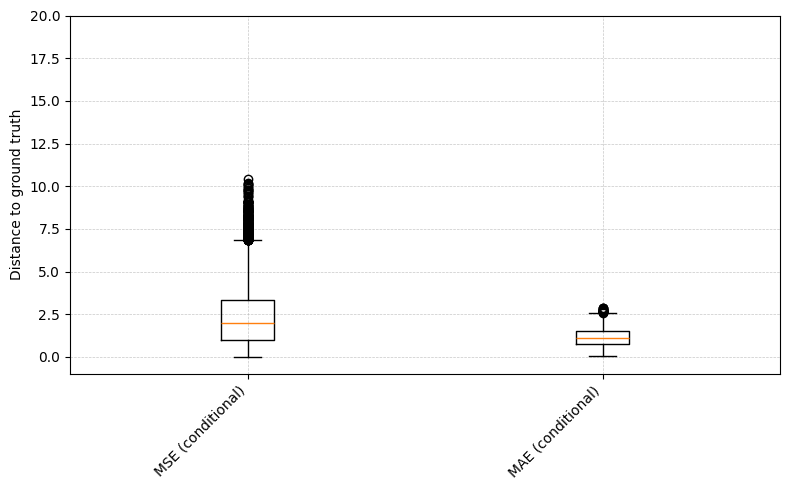

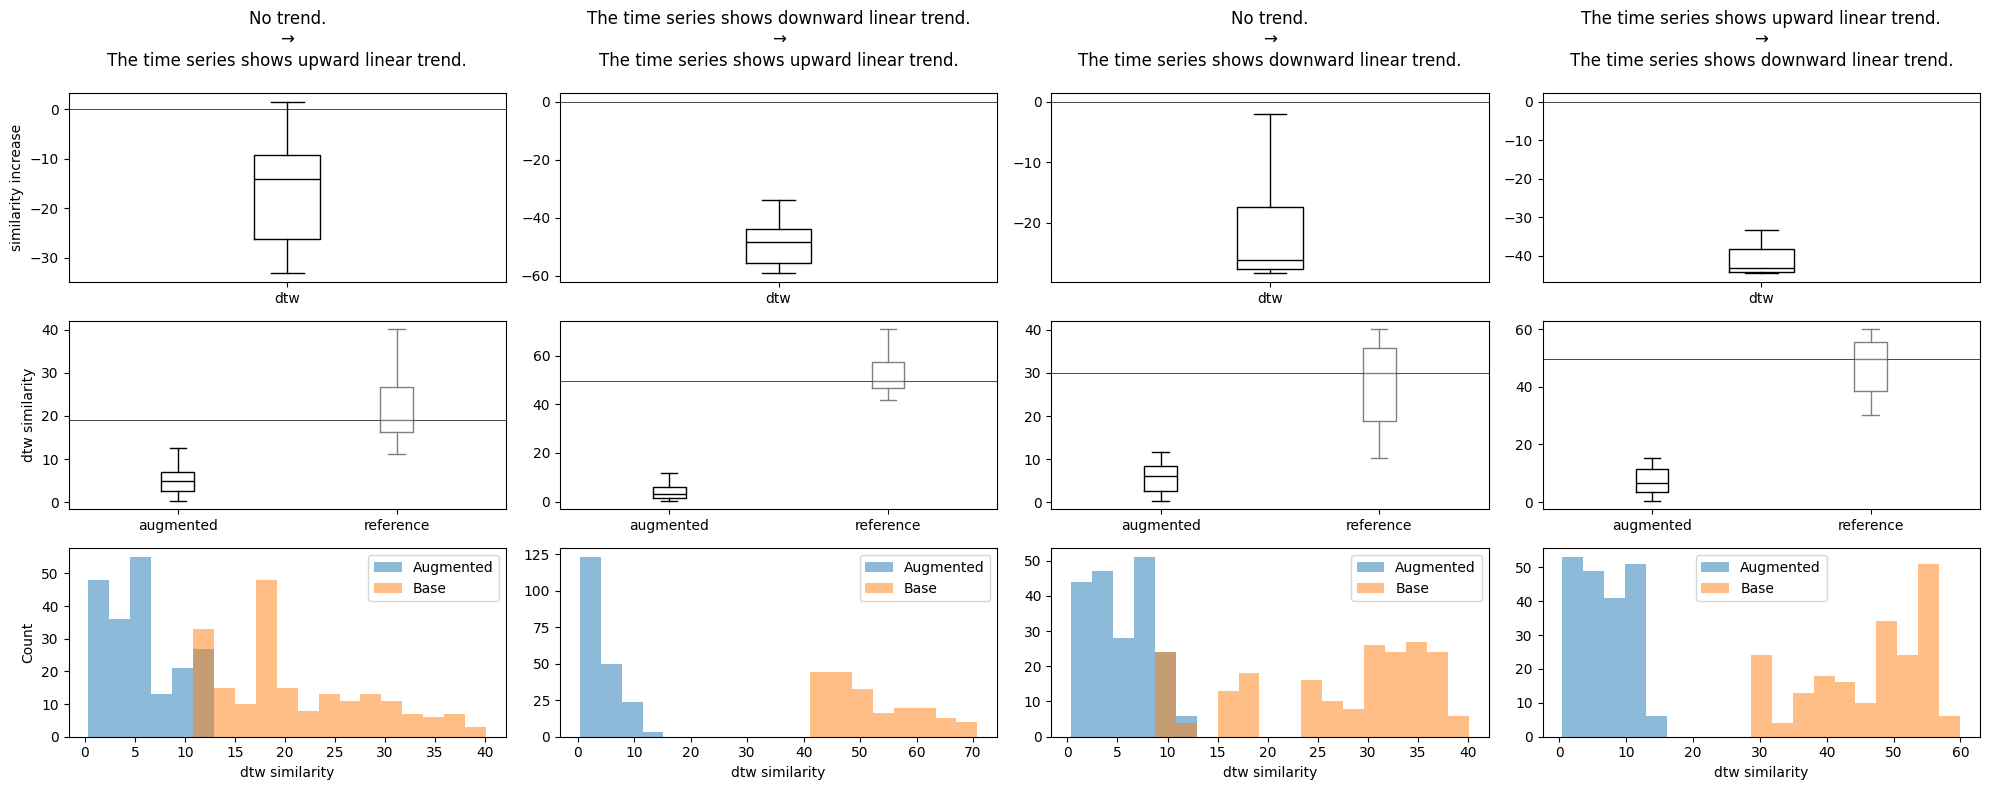

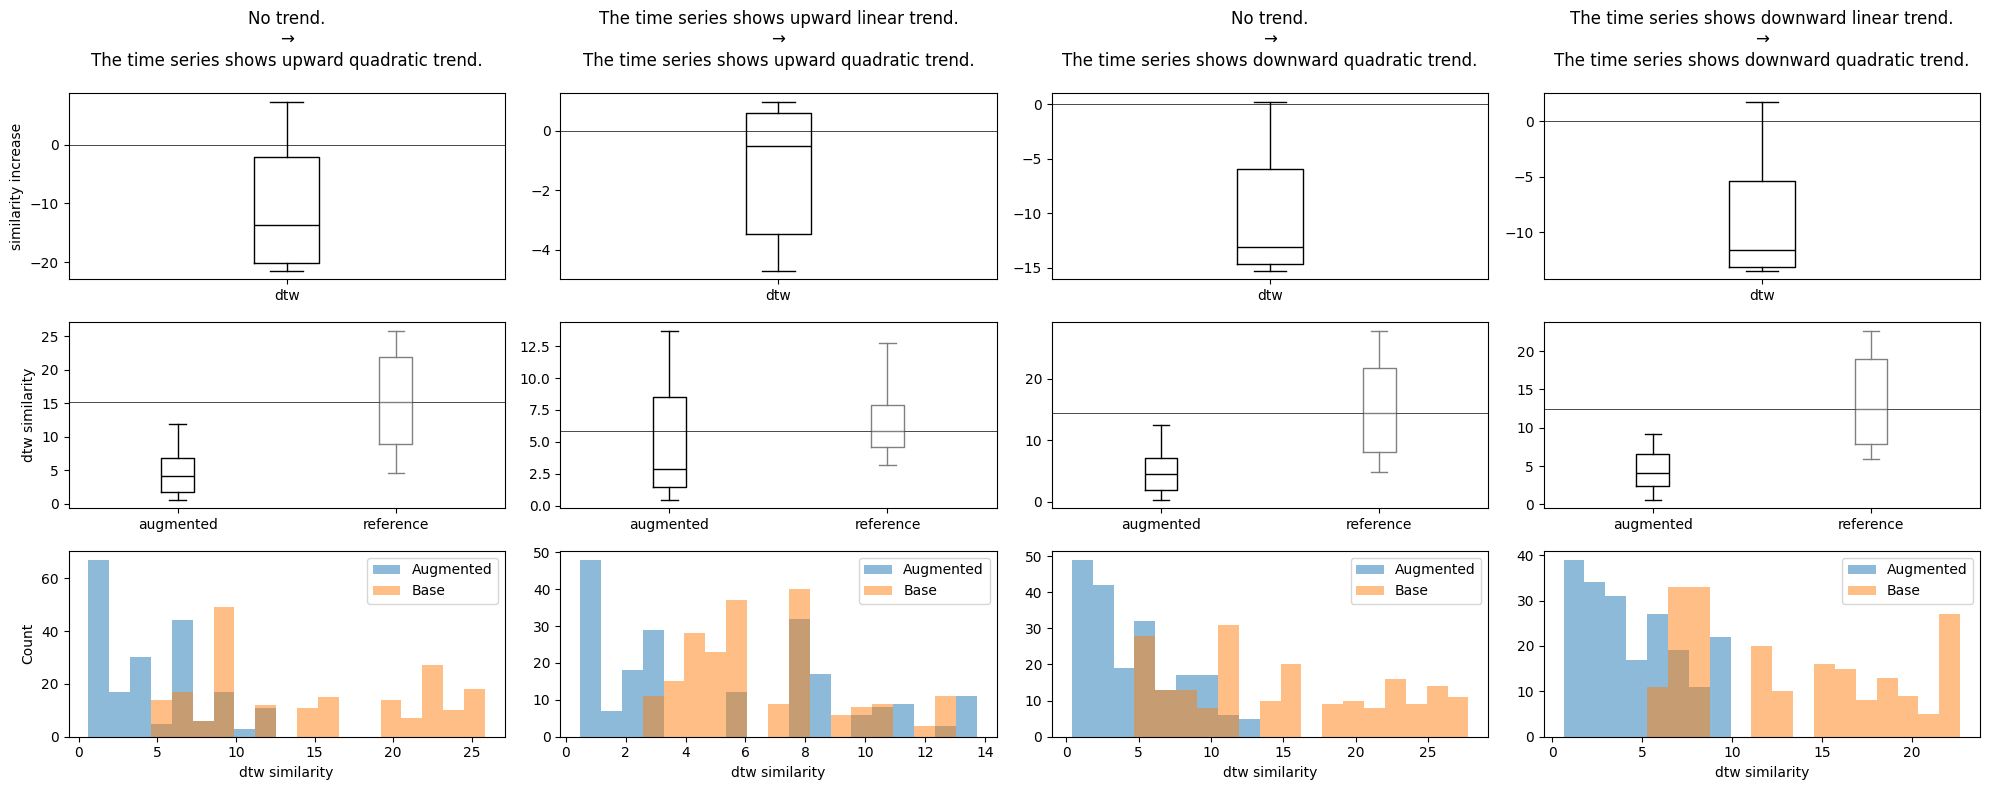

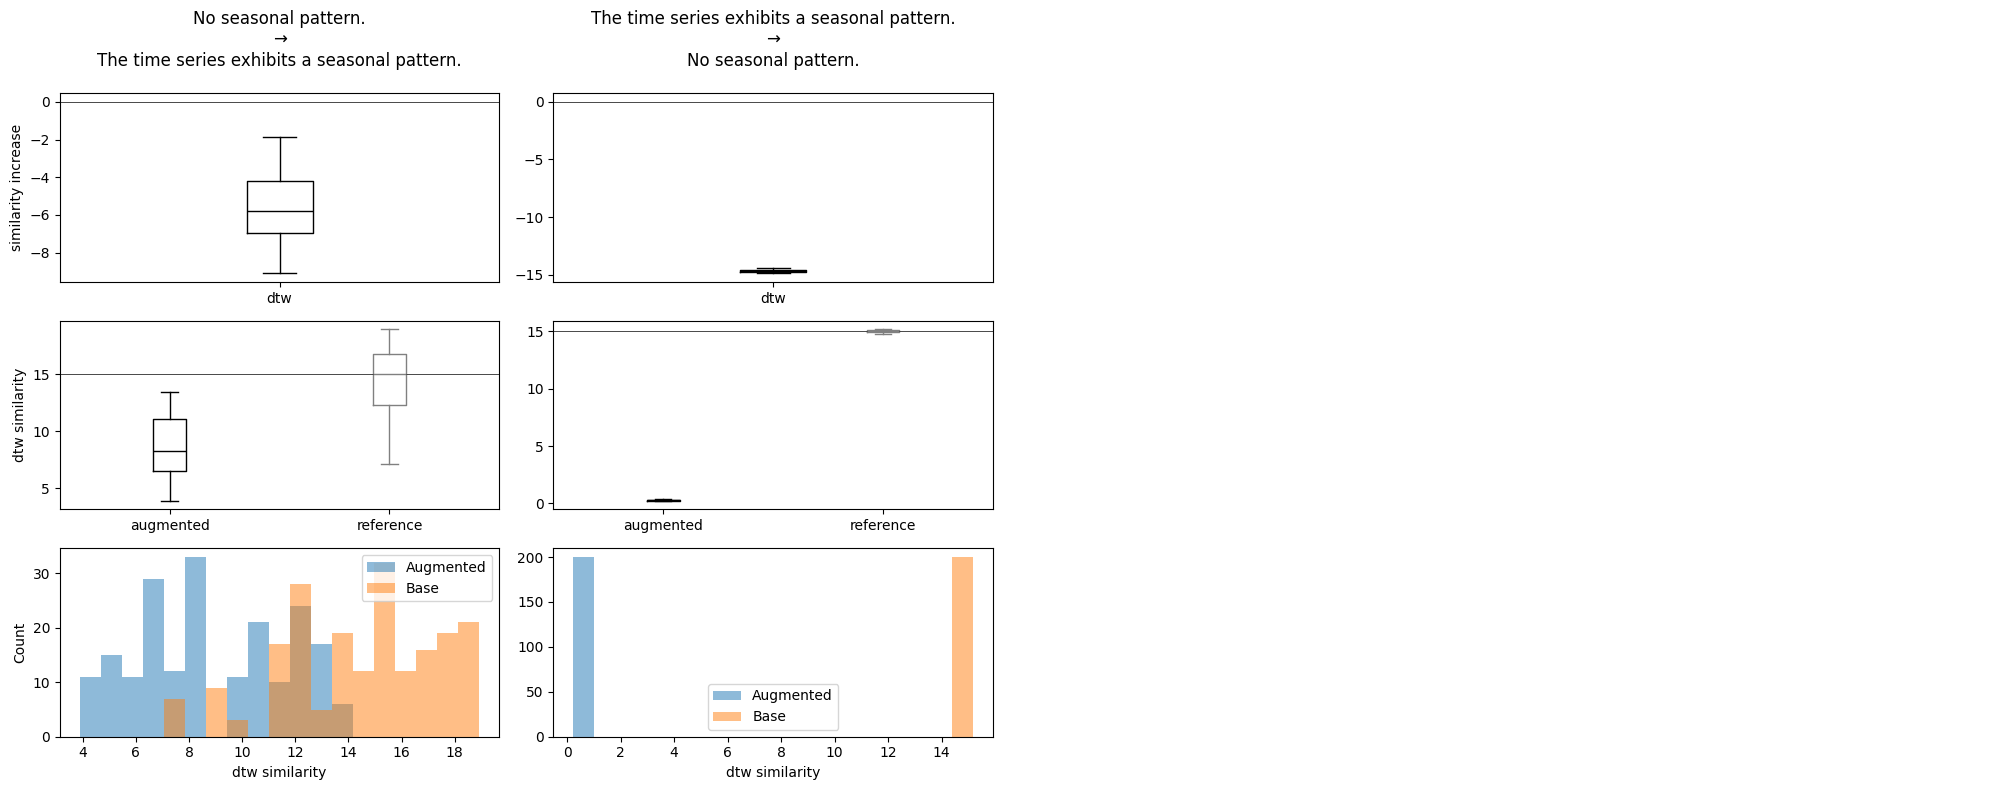

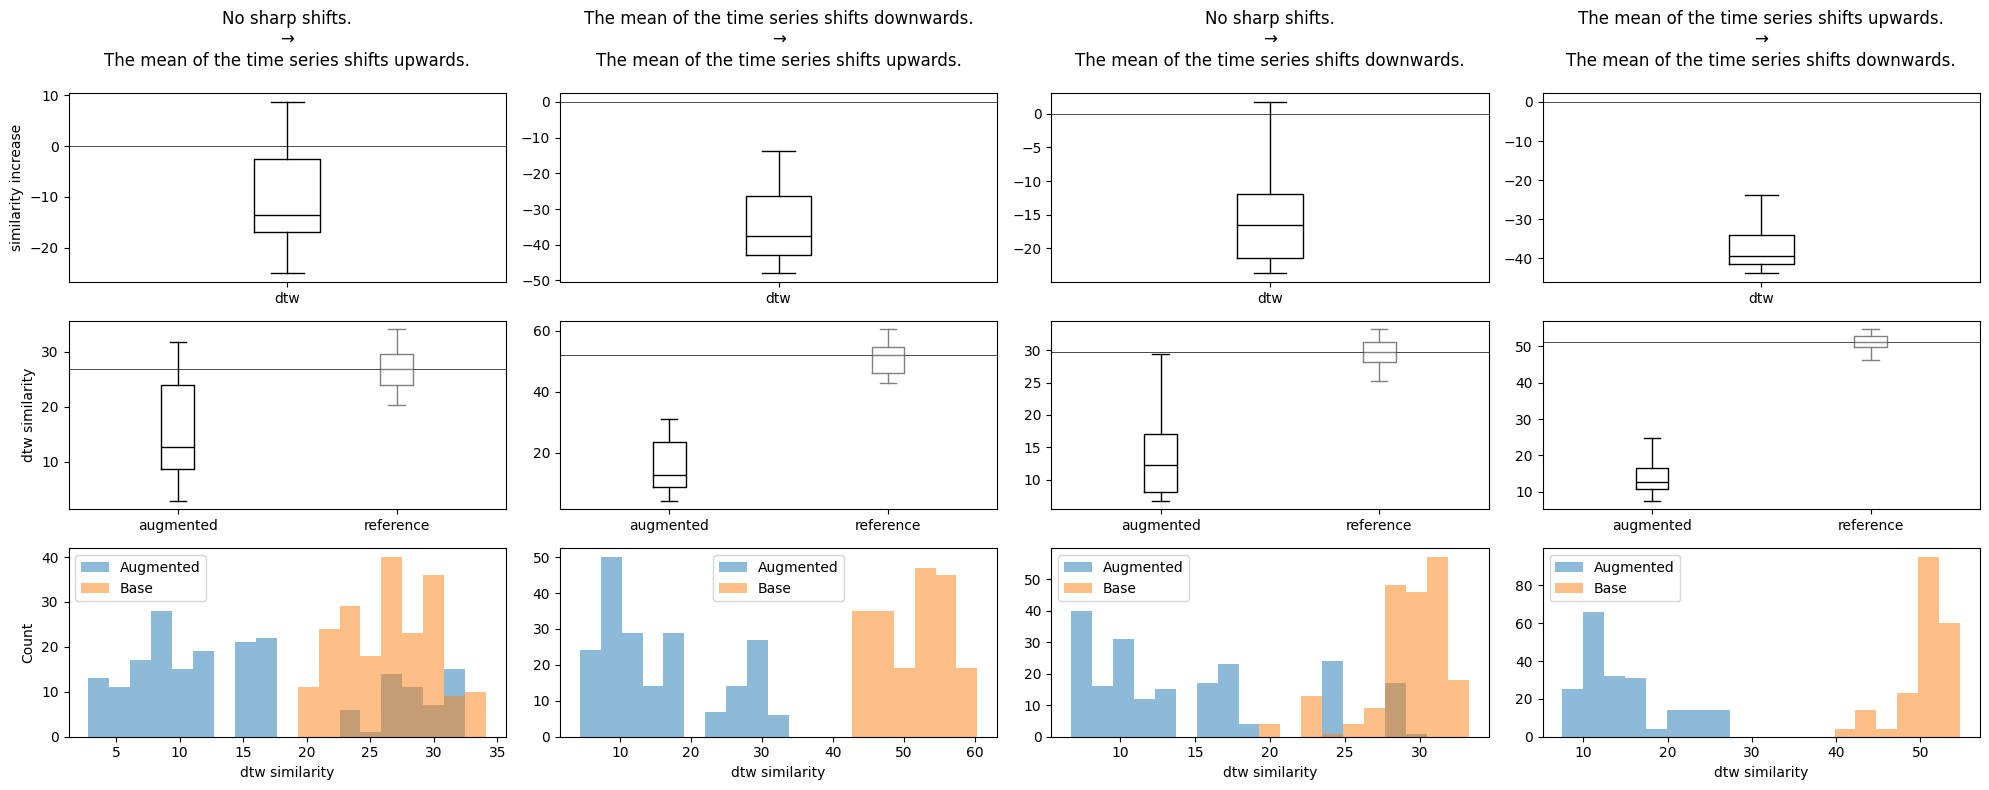

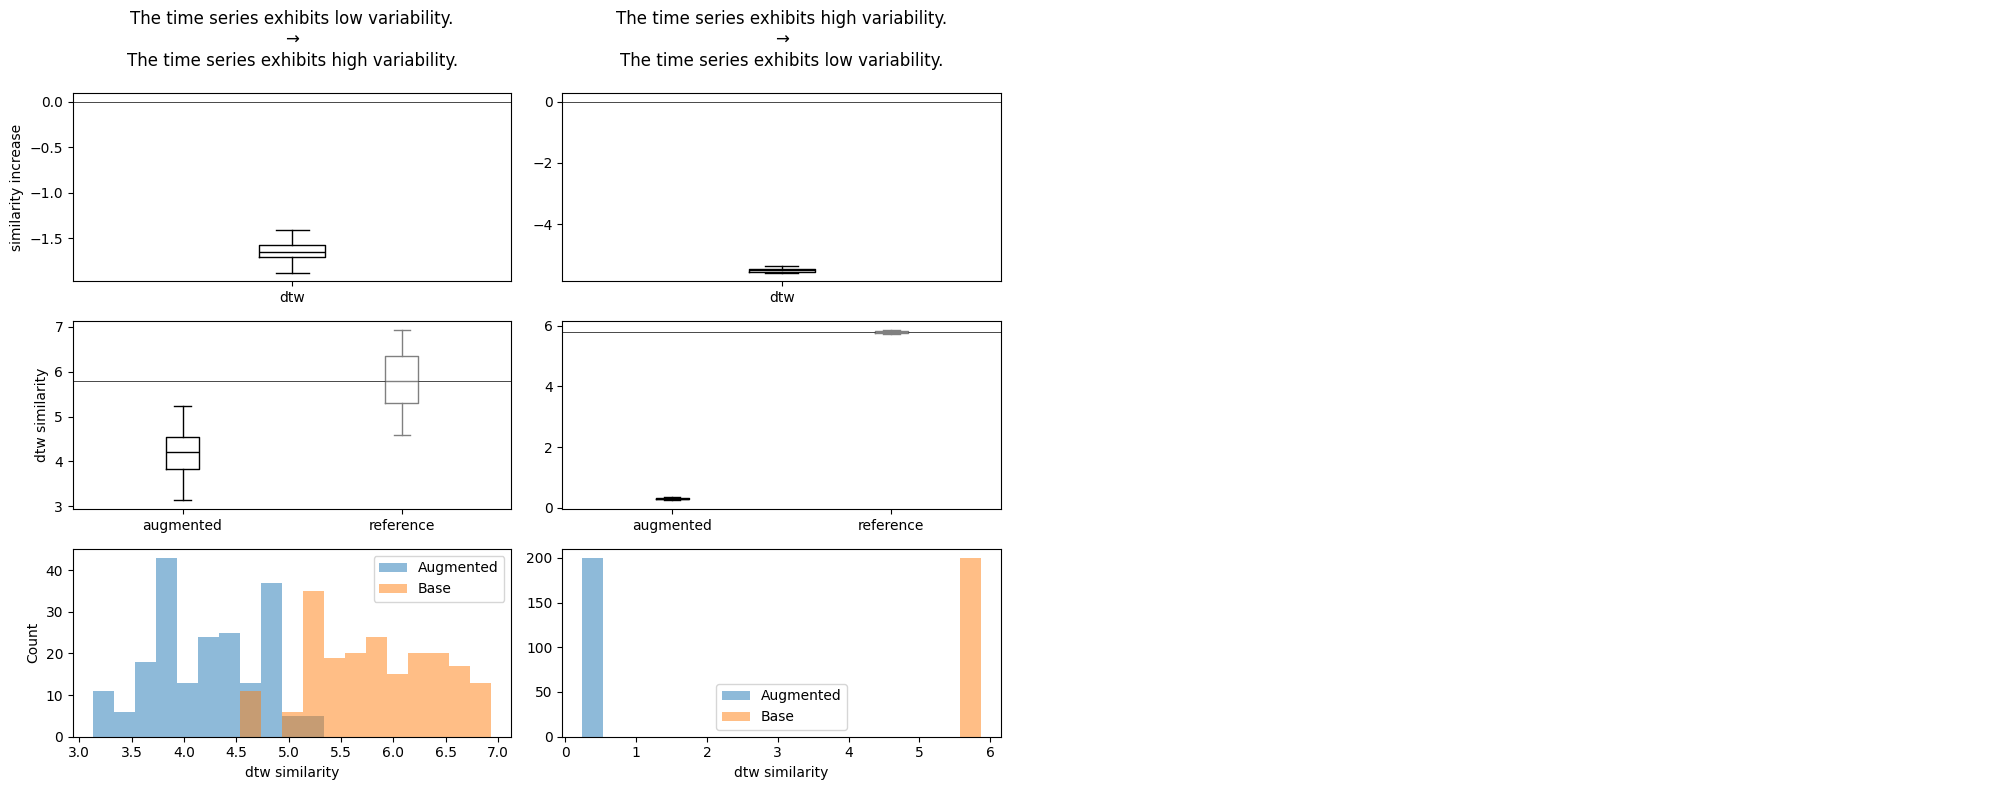

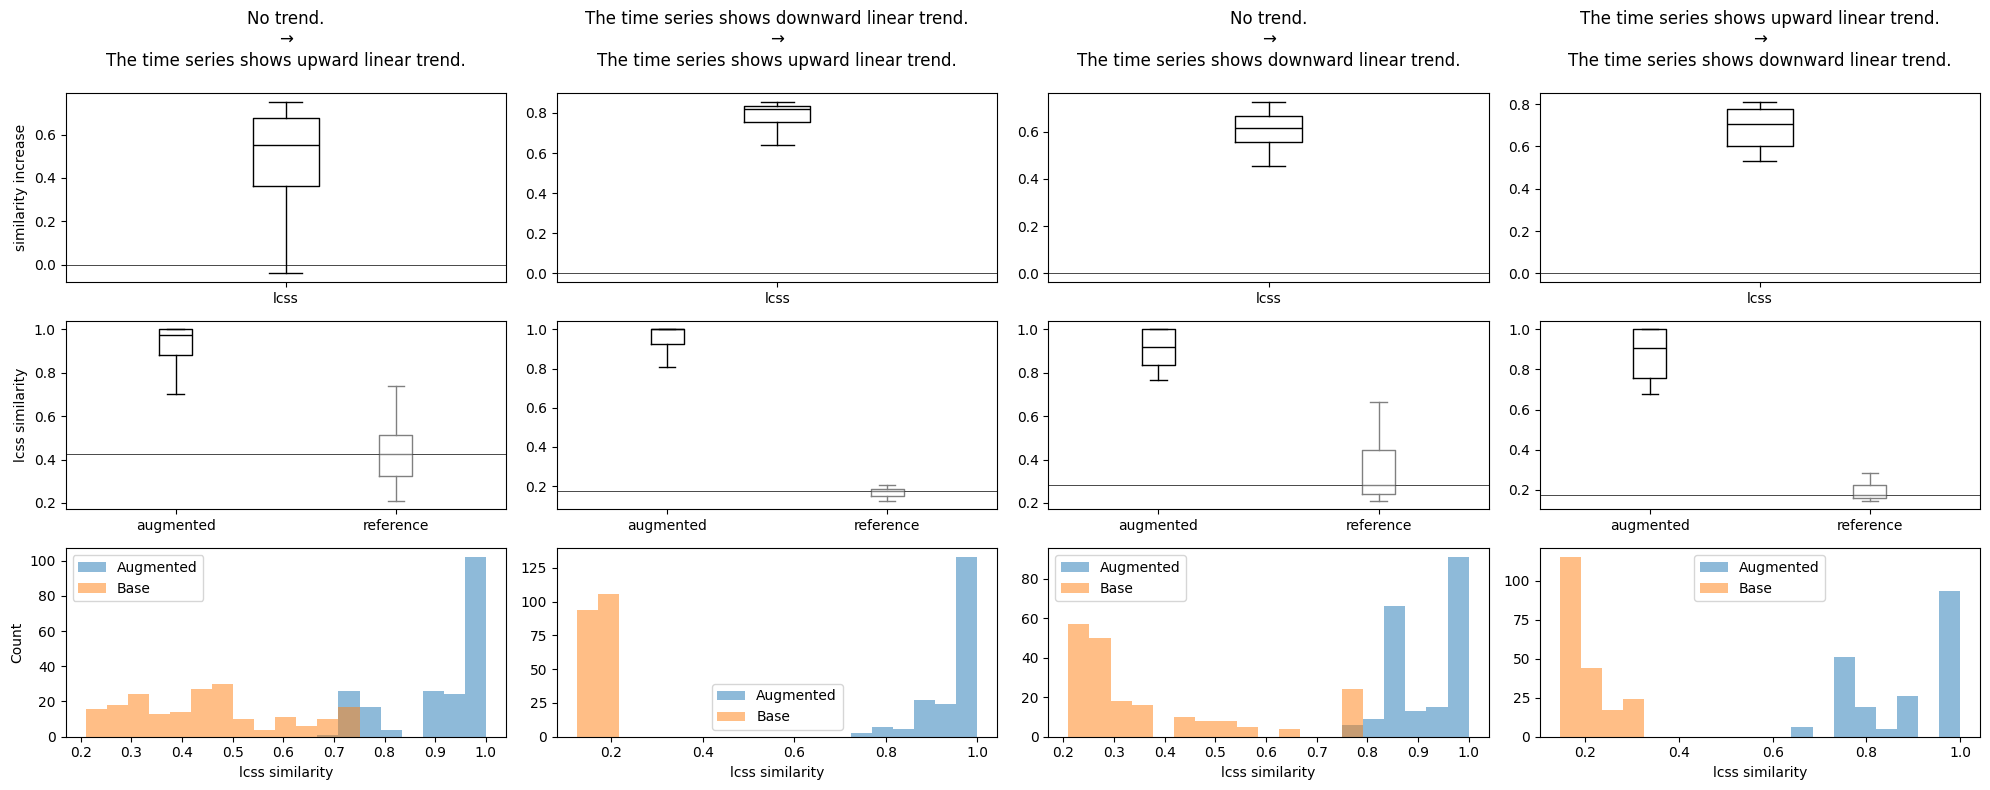

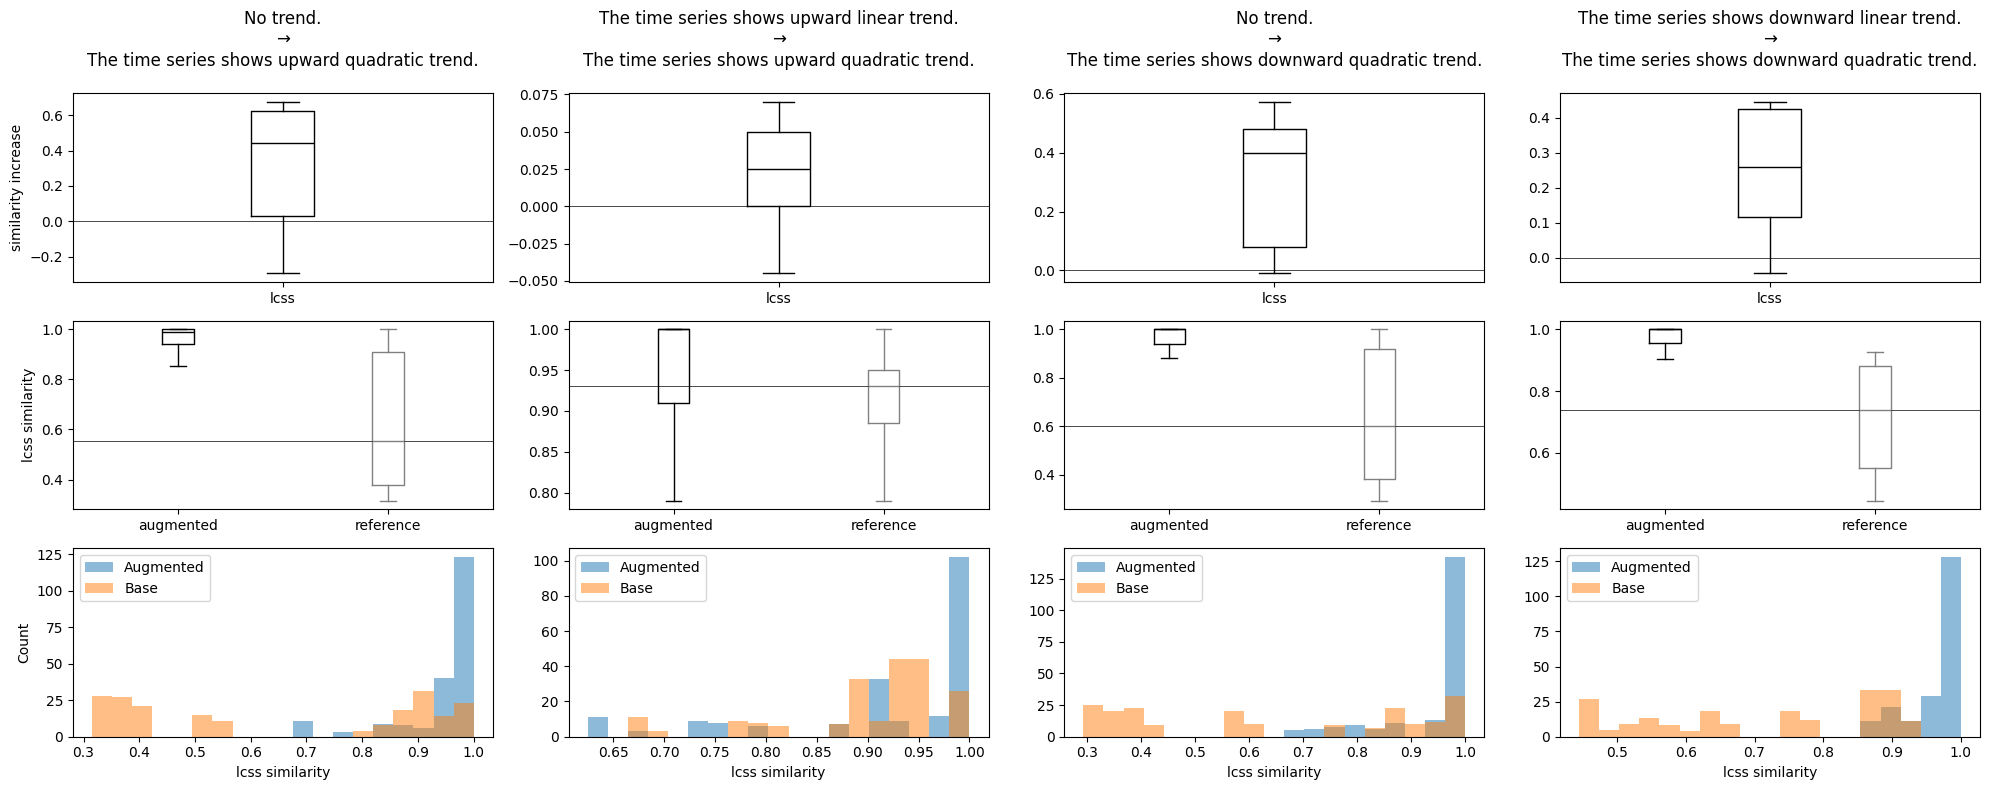

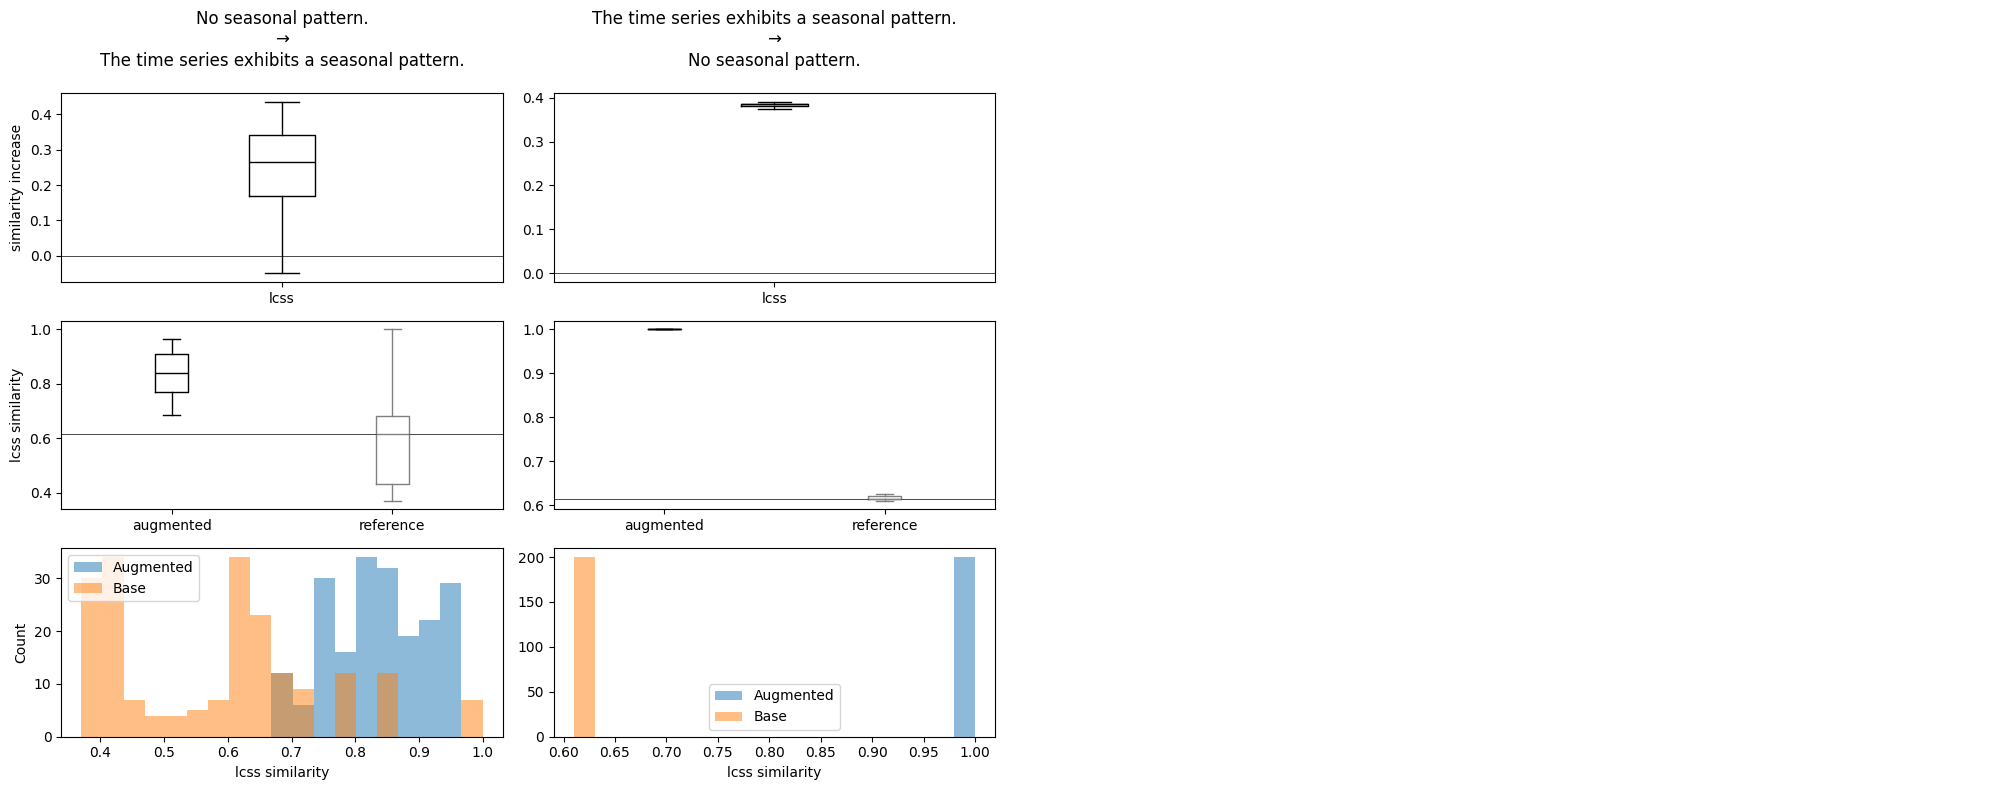

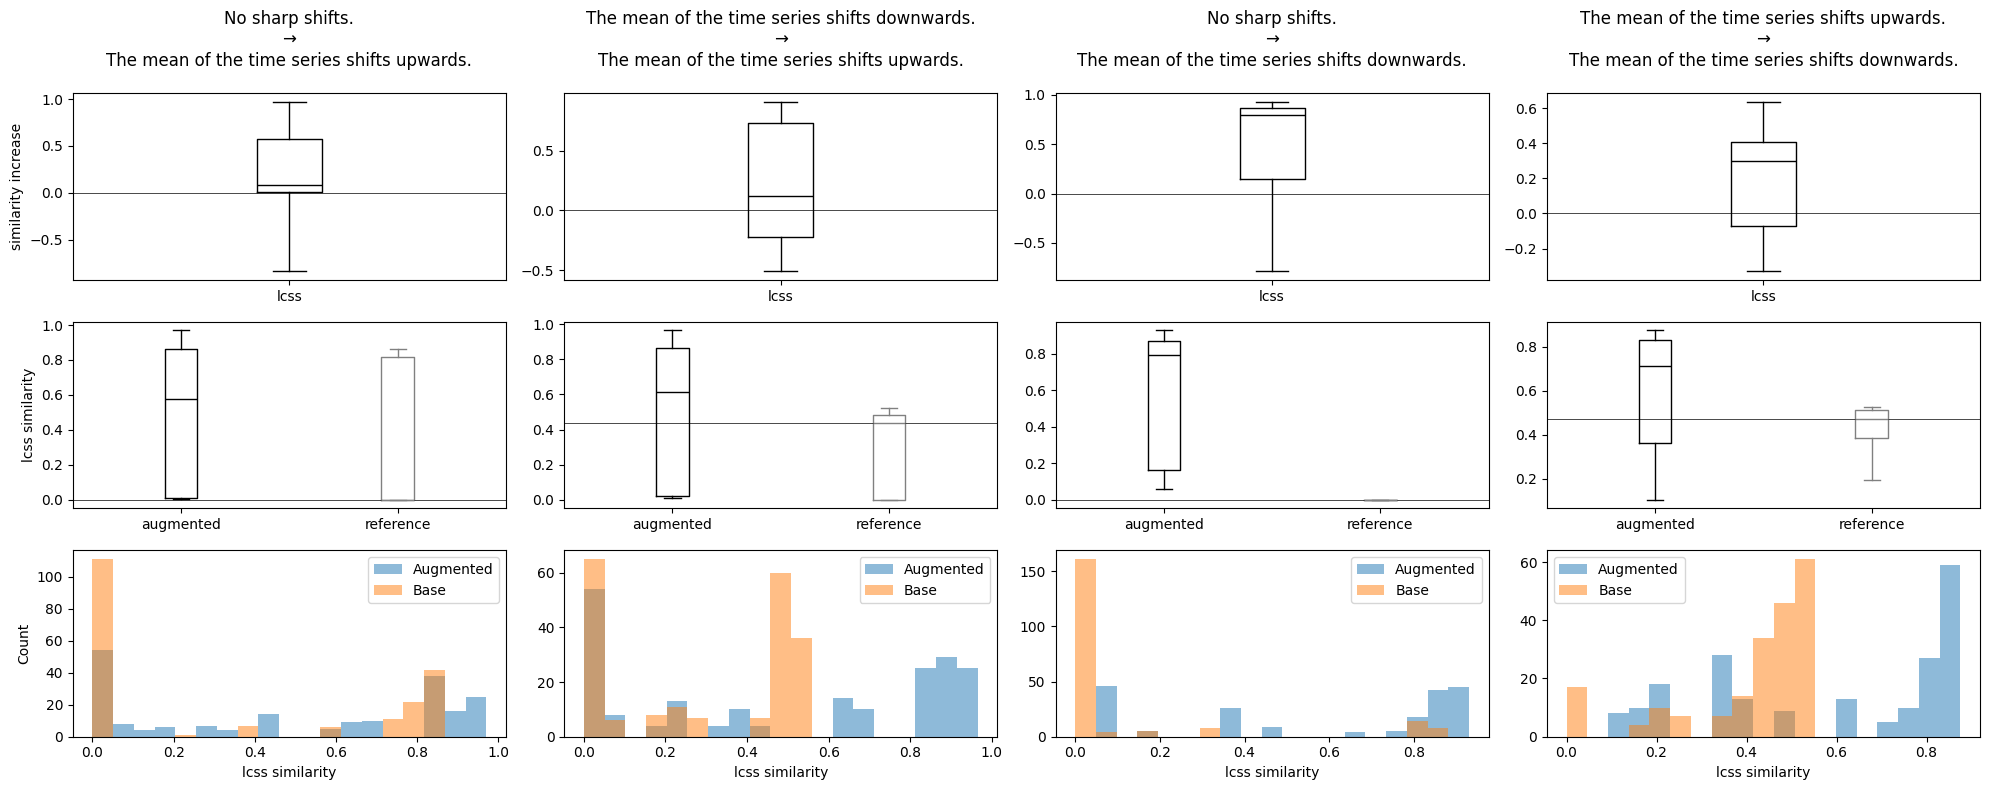

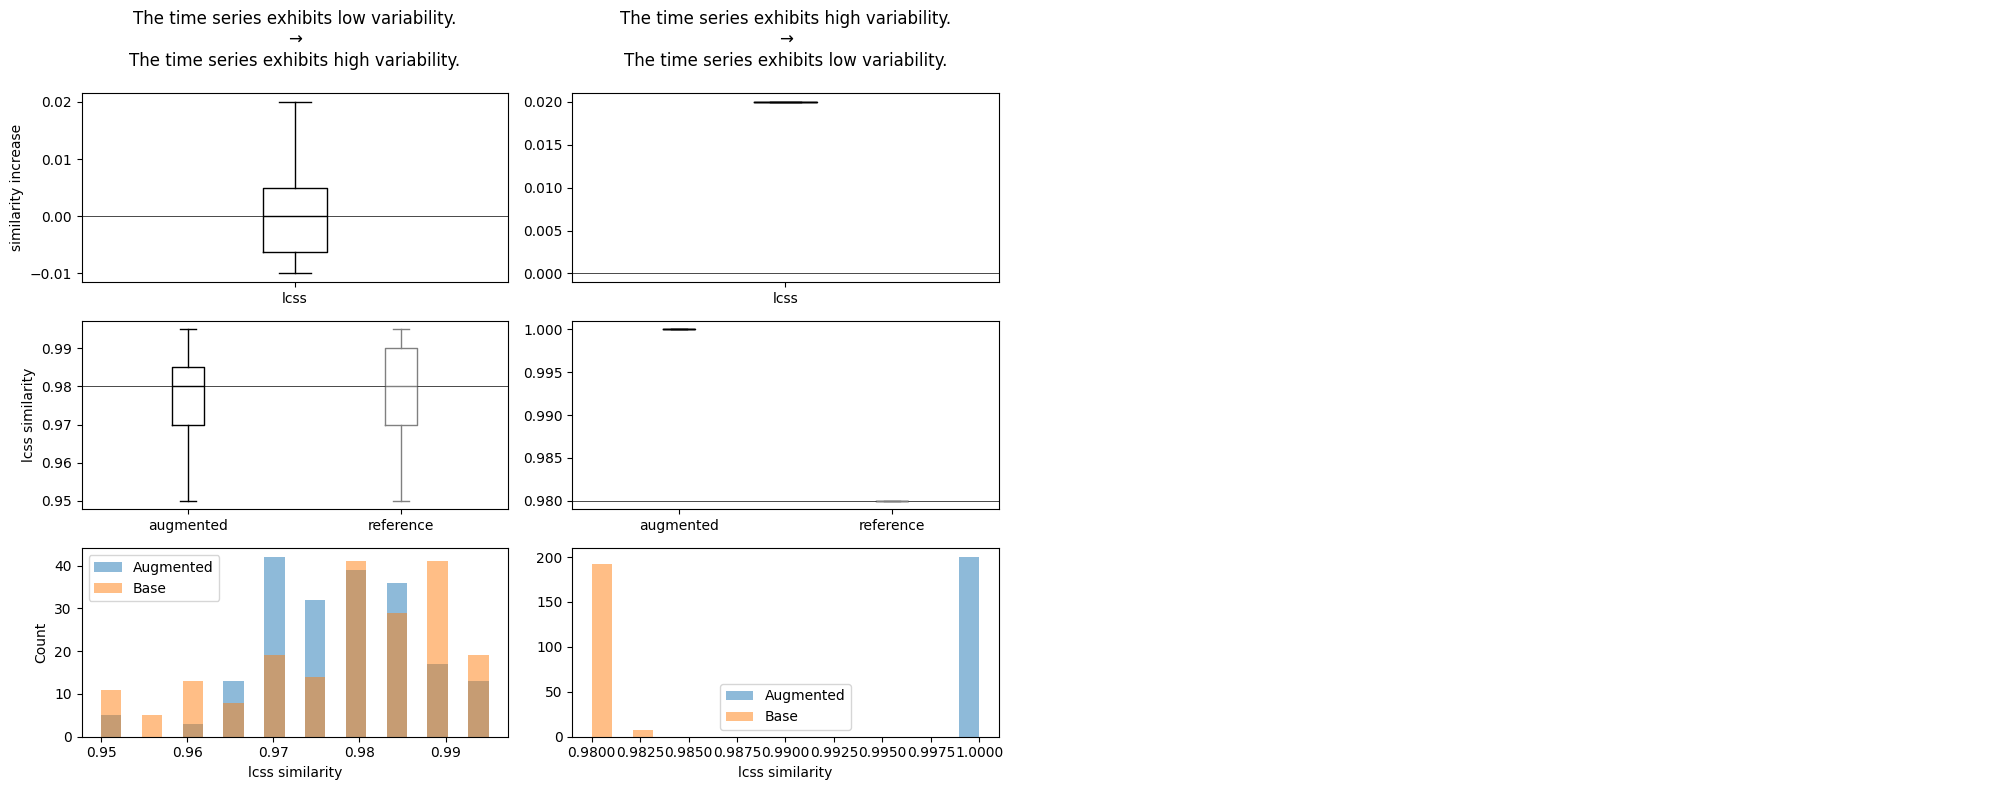

--------------------------------------------------------------------------------


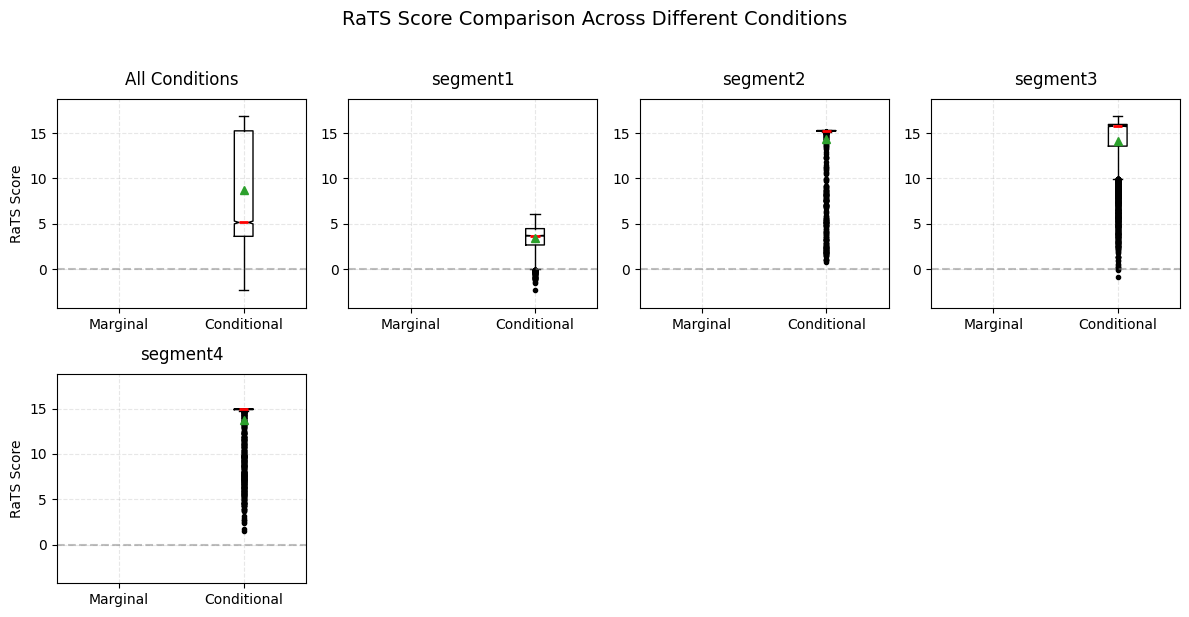

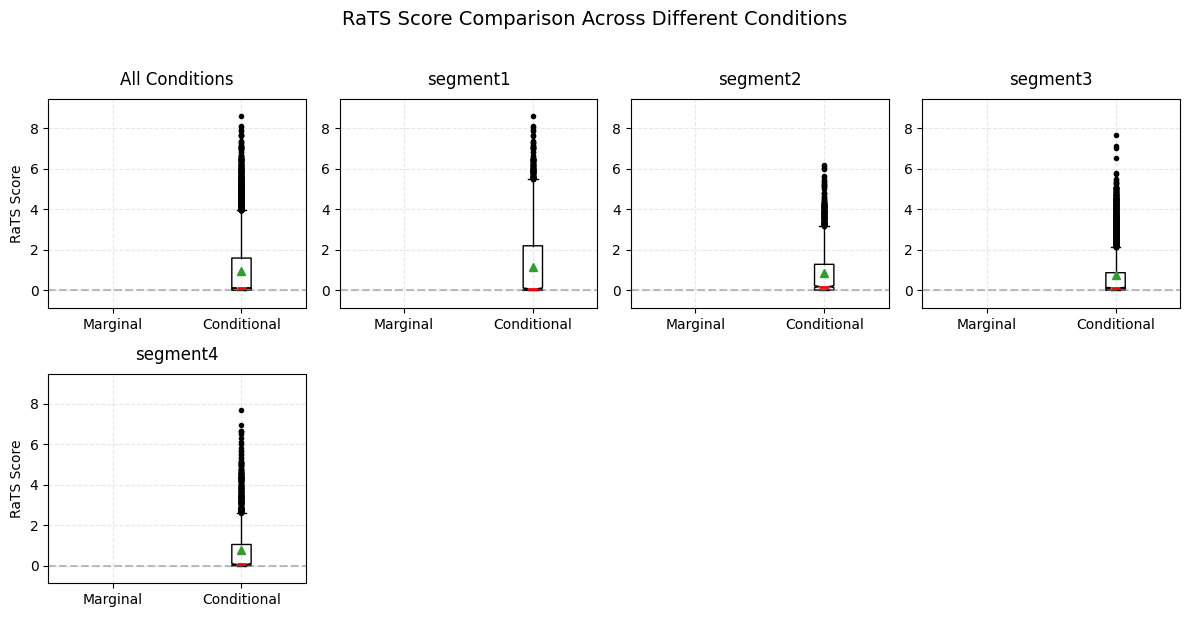

In [4]:
w = 0.8
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())


In [5]:
summarize_scores(df_all)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW distance decrease ↓,LCSS similarity increase ↑,RaTS ↑,|RaTS (preserved)|↓
final_score,2.32 (1.72),1.13 (0.52),-17.52 (15.64),0.31 (0.35),8.77 (5.80),0.97 (1.45)


In [6]:
summarize_scores(df_all, mean_sd=False)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW distance decrease ↓,LCSS similarity increase ↑,RaTS ↑,|RaTS (preserved)|↓
final_score,"1.99 [1.00, 3.33]","1.12 [0.76, 1.49]","-14.56 [-27.05, -4.71]","0.36 [0.02, 0.61]","5.15 [3.62, 15.25]","0.10 [0.00, 1.59]"


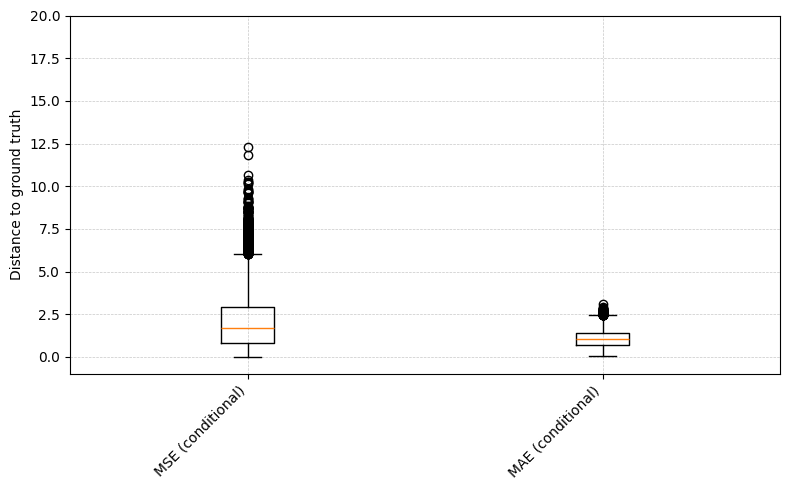

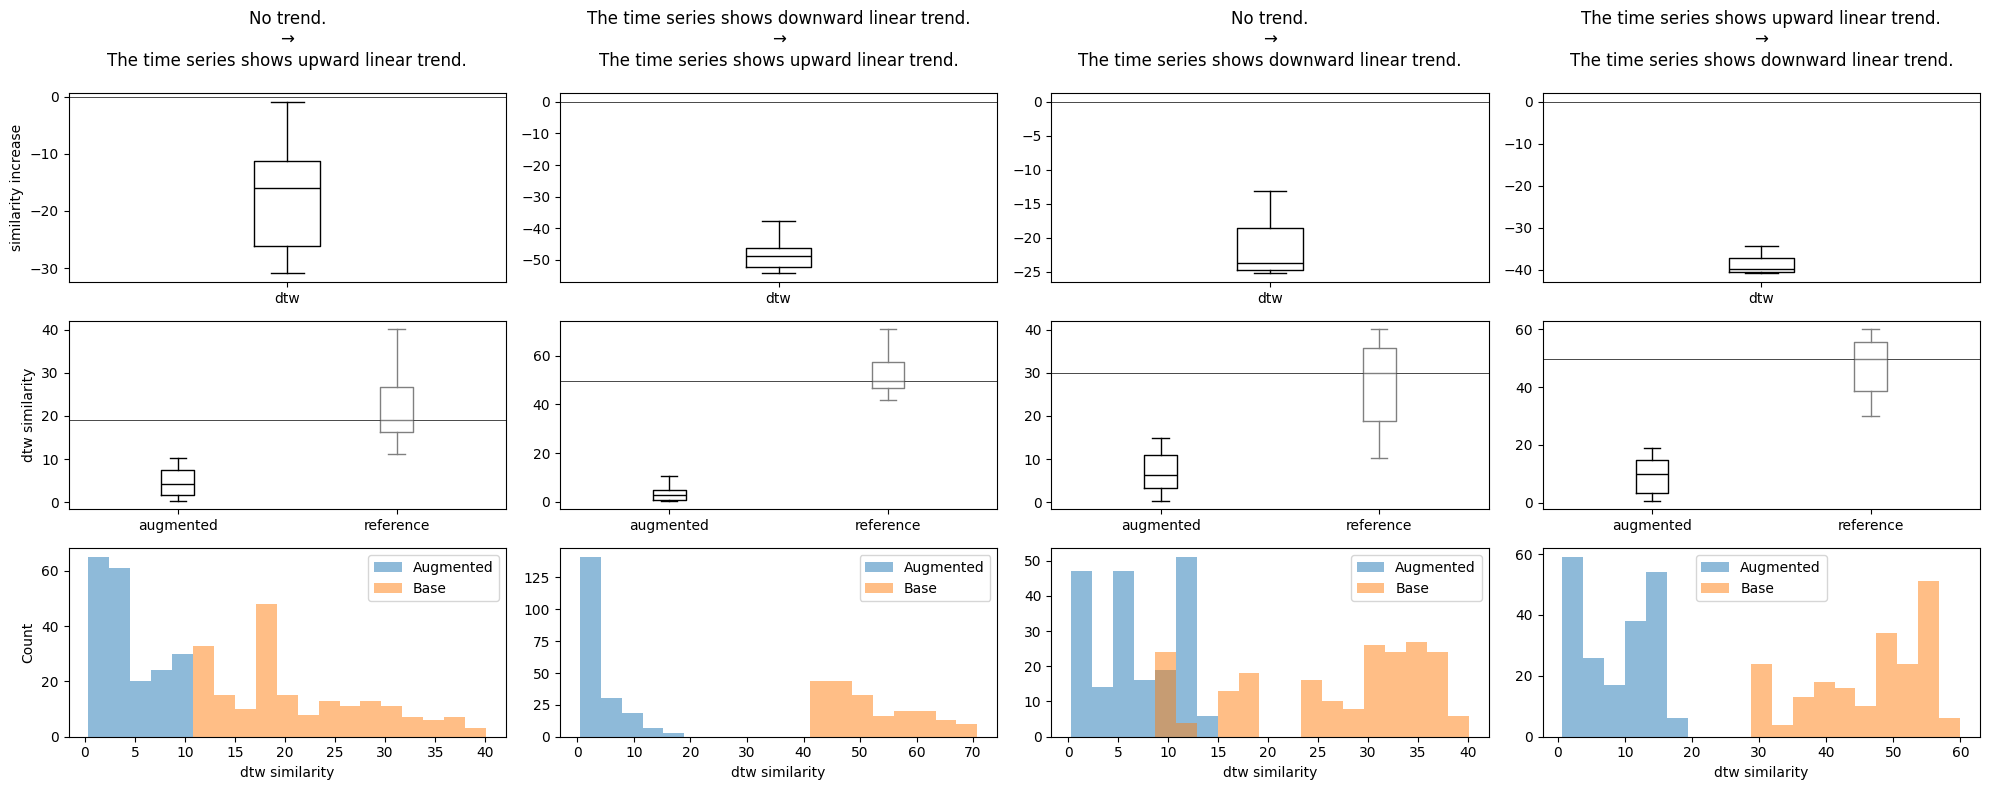

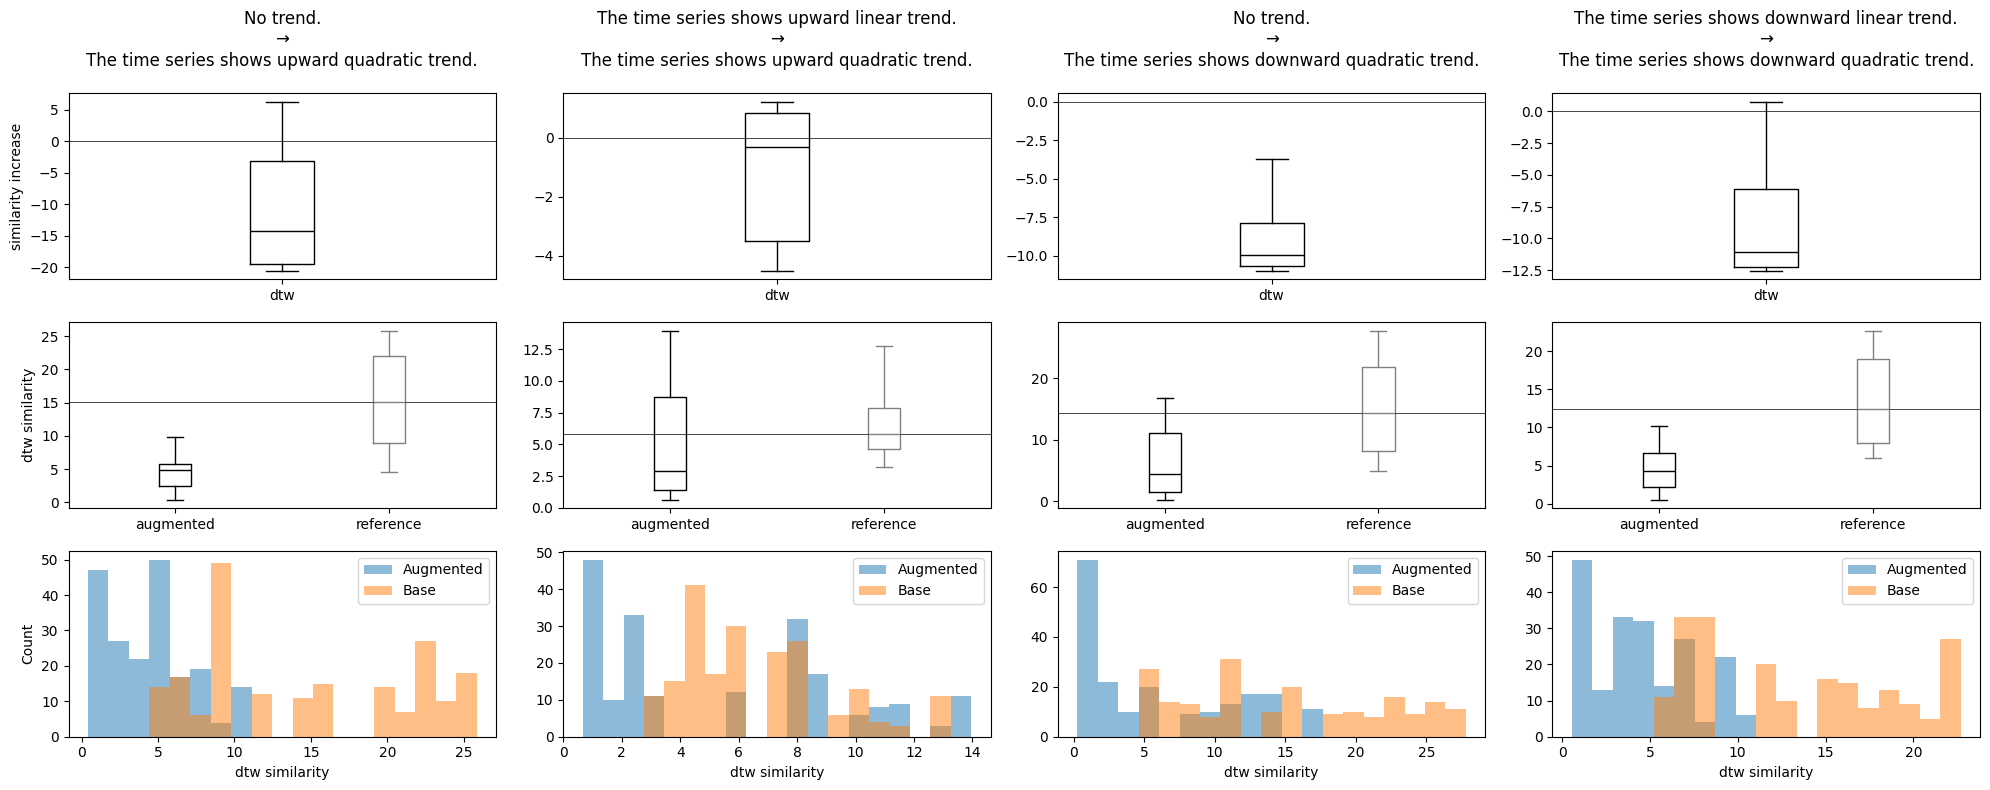

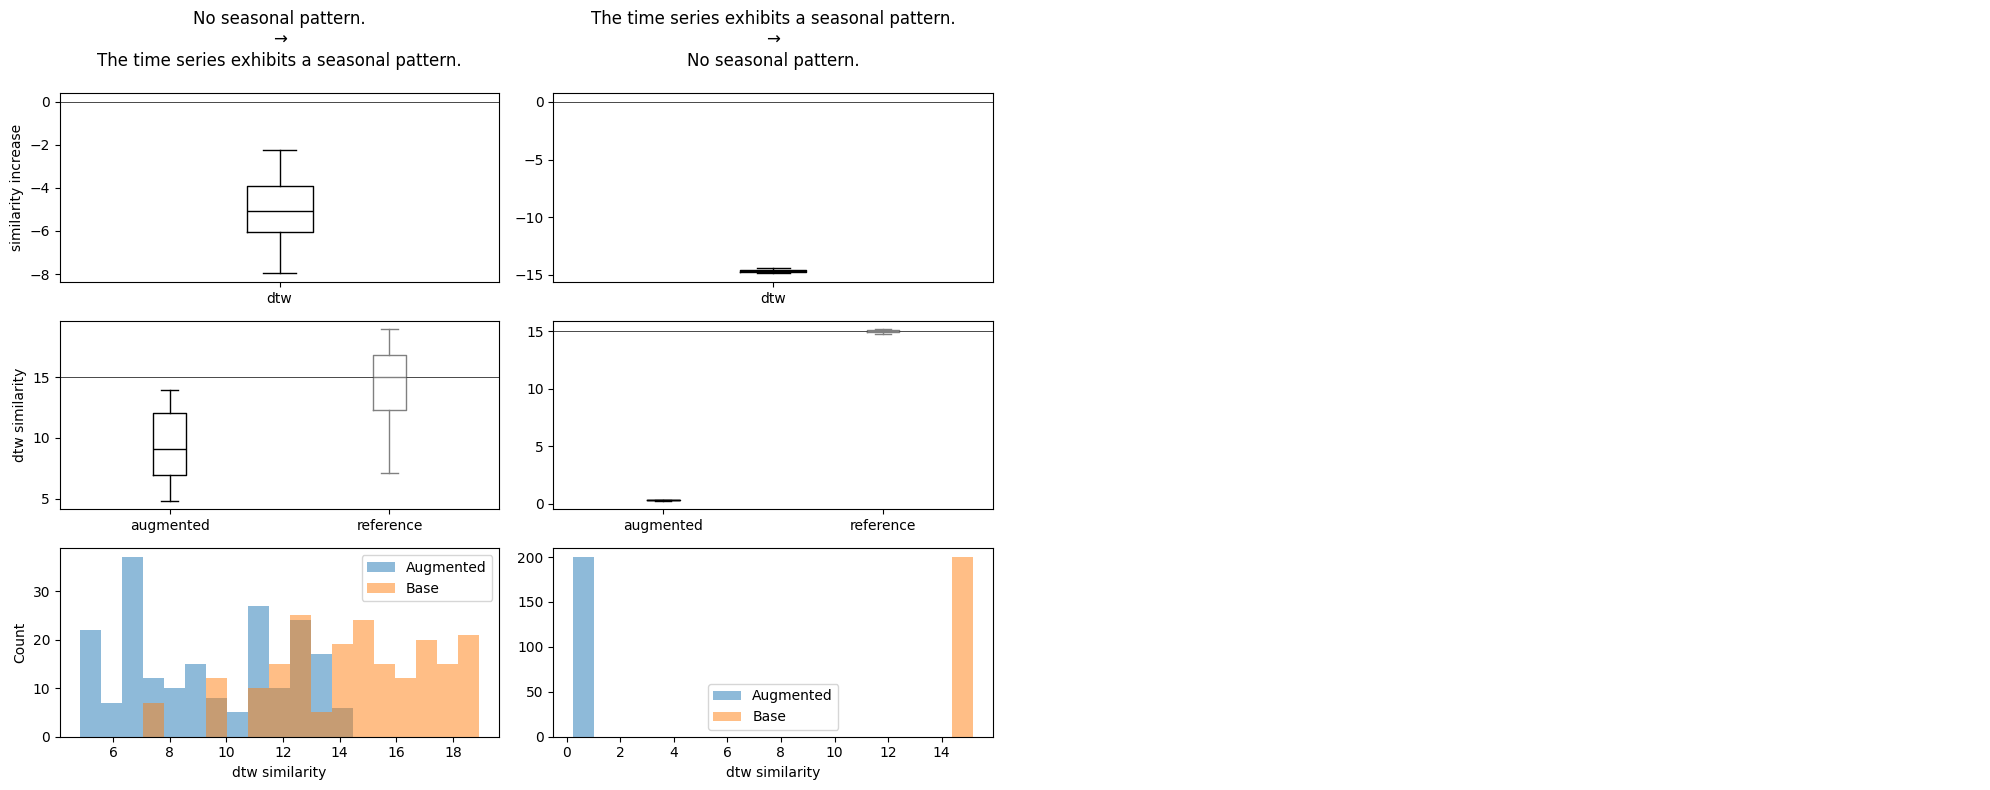

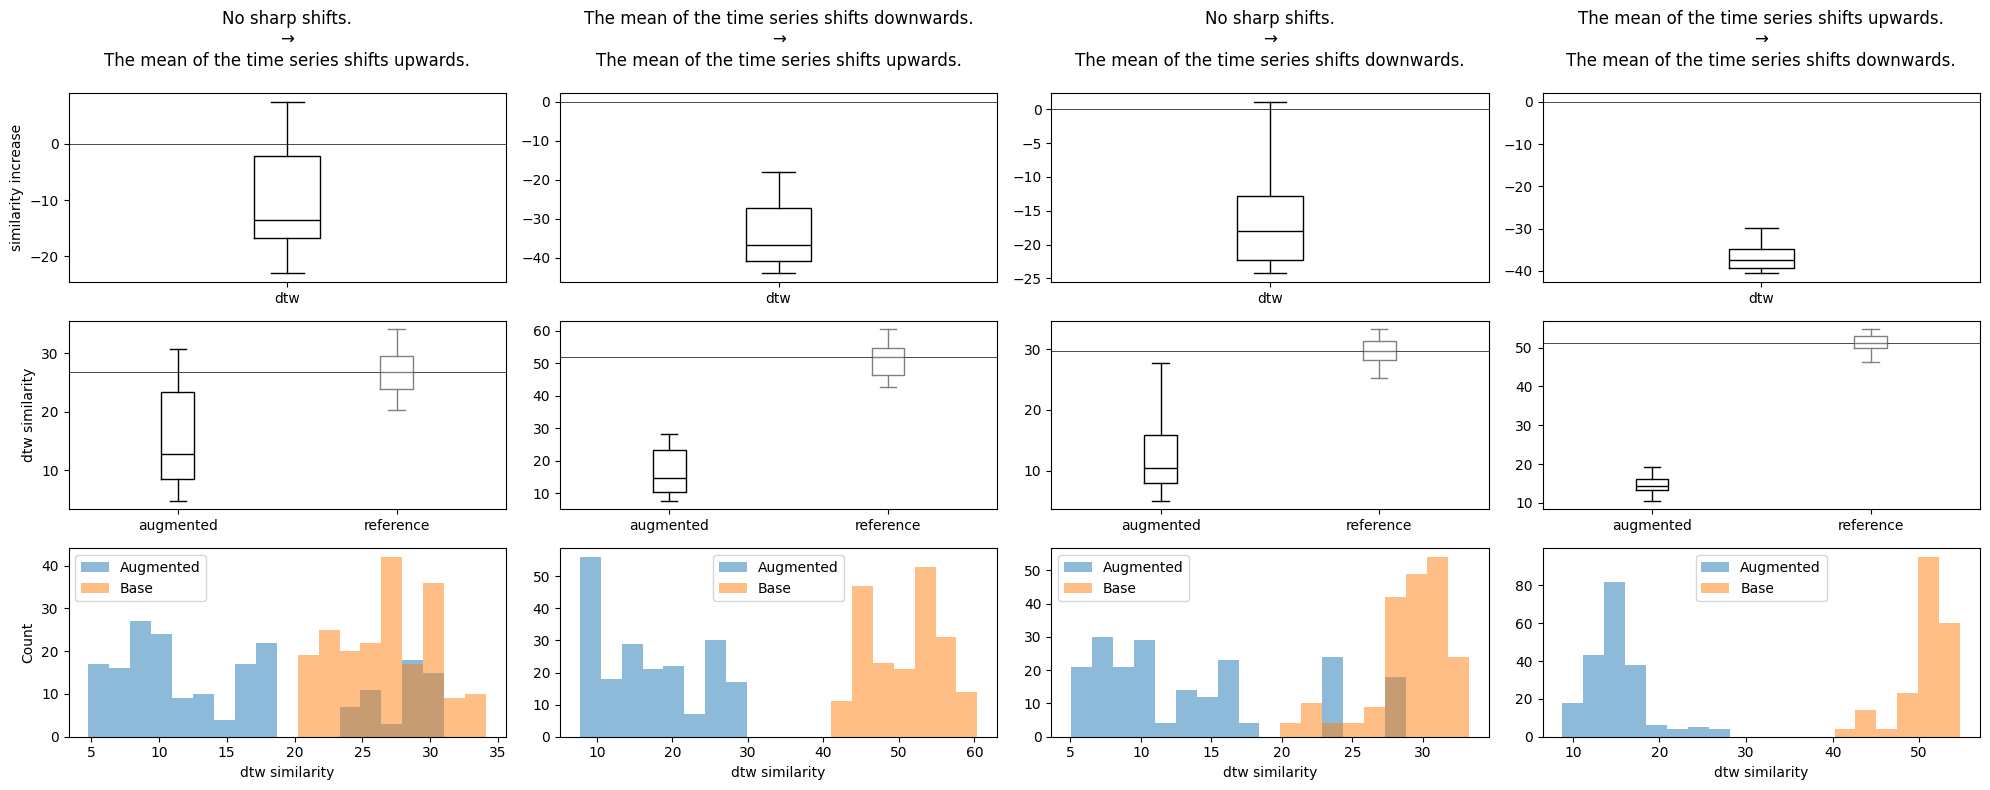

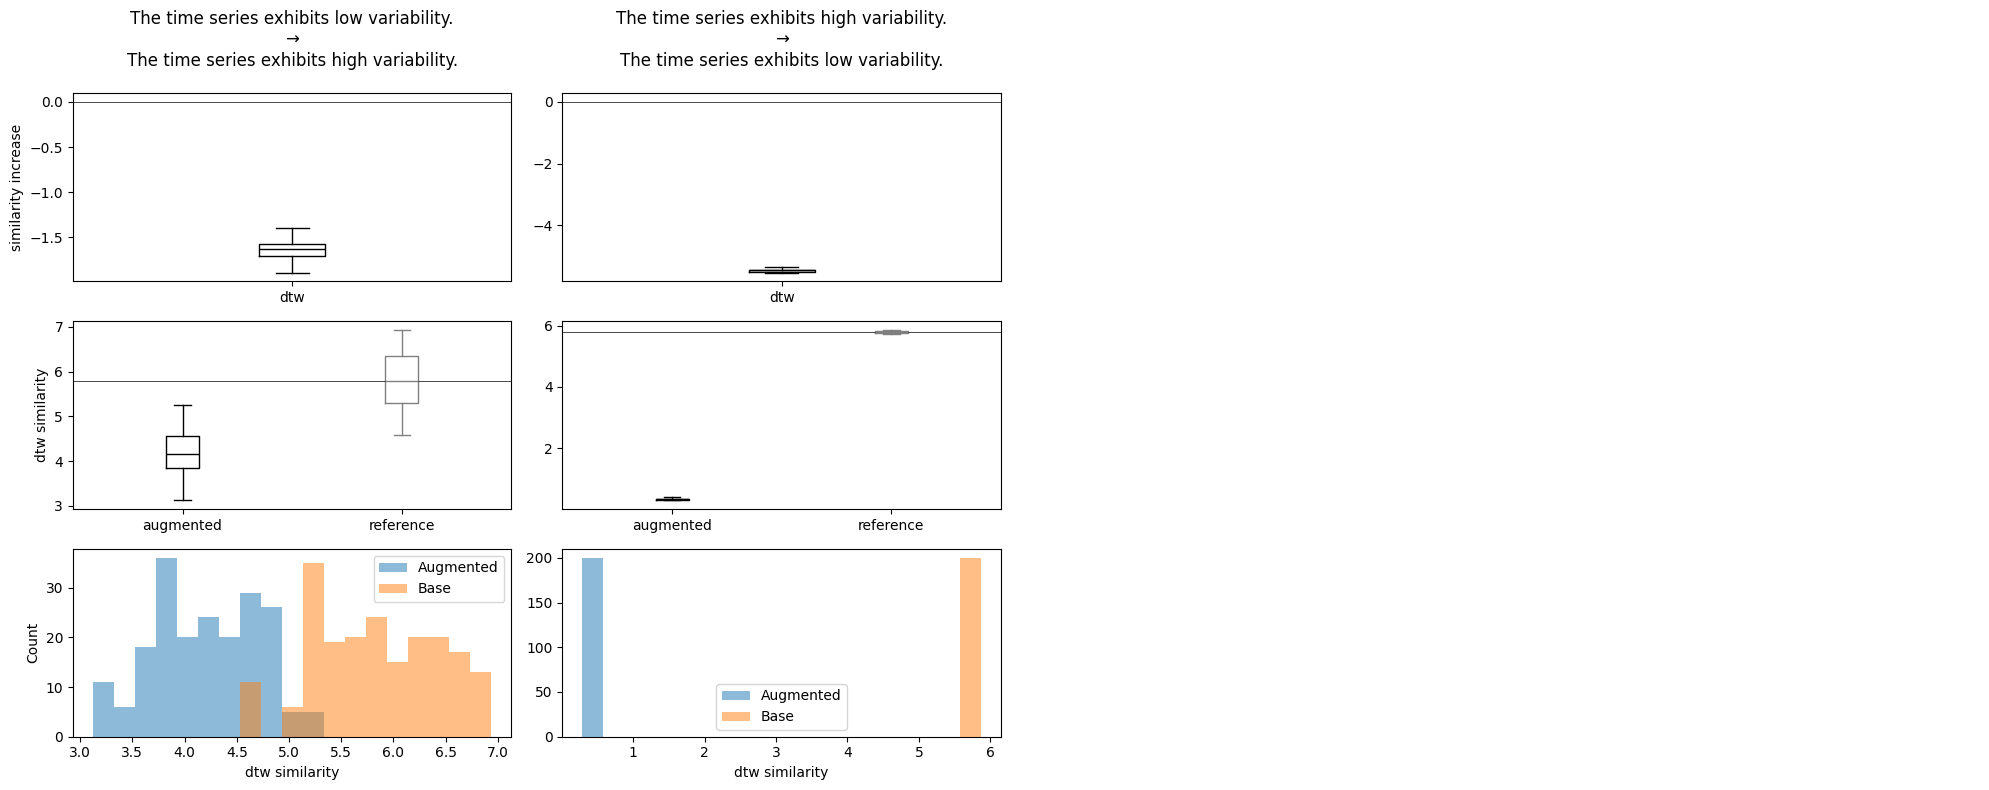

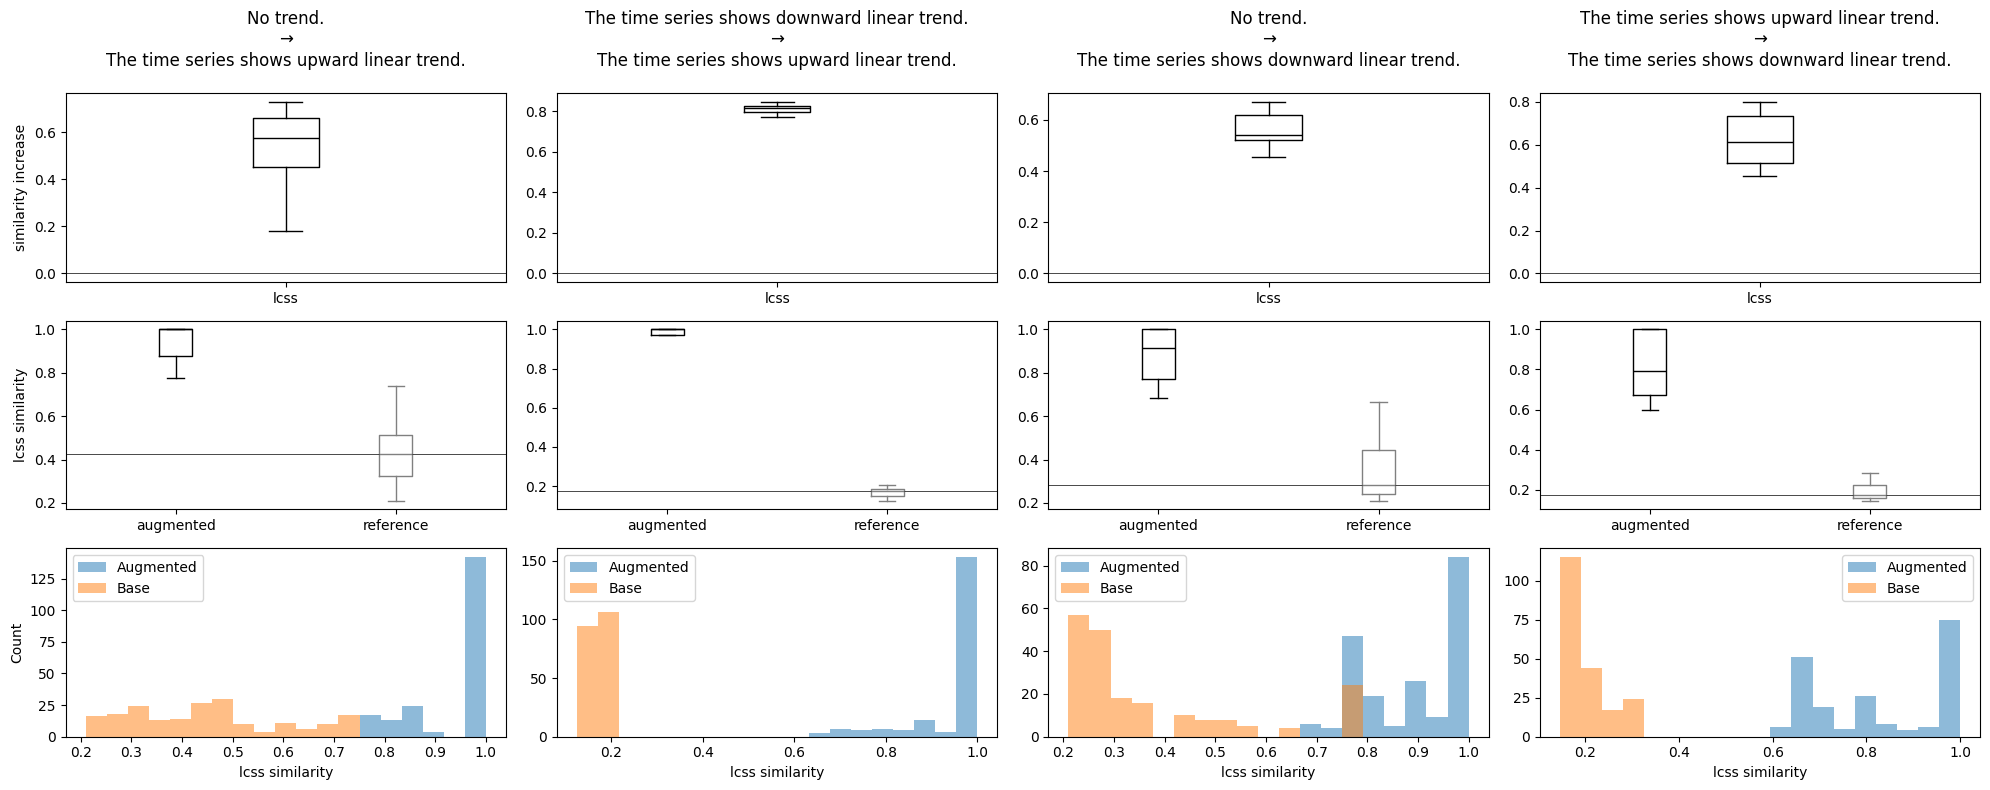

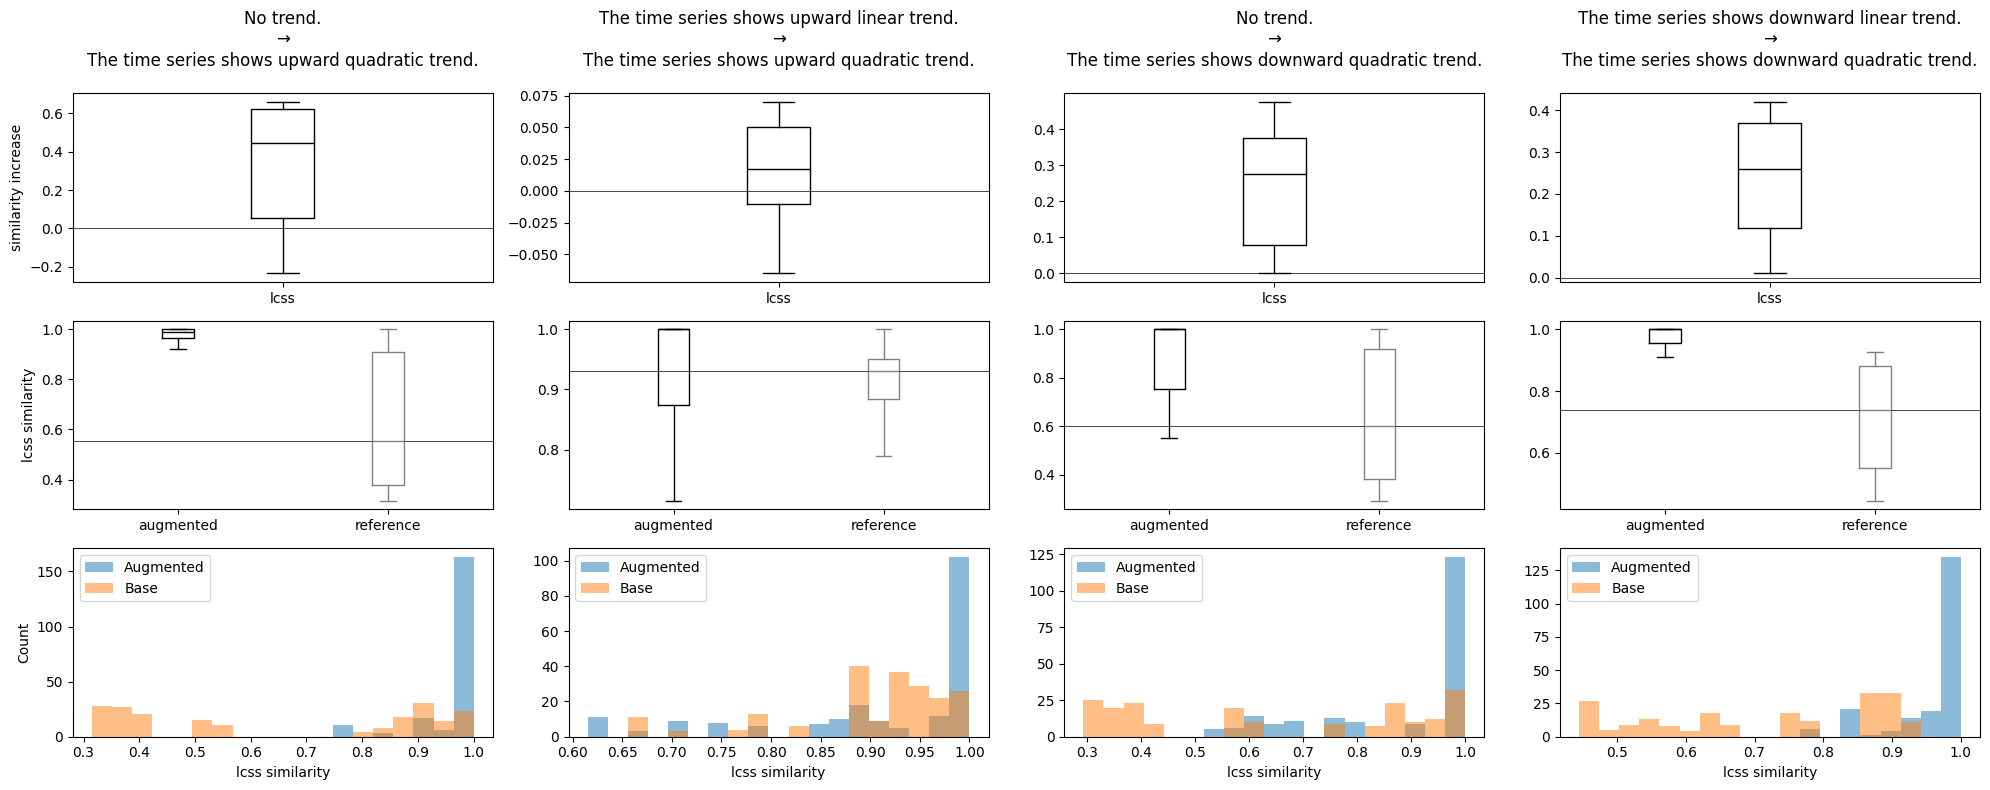

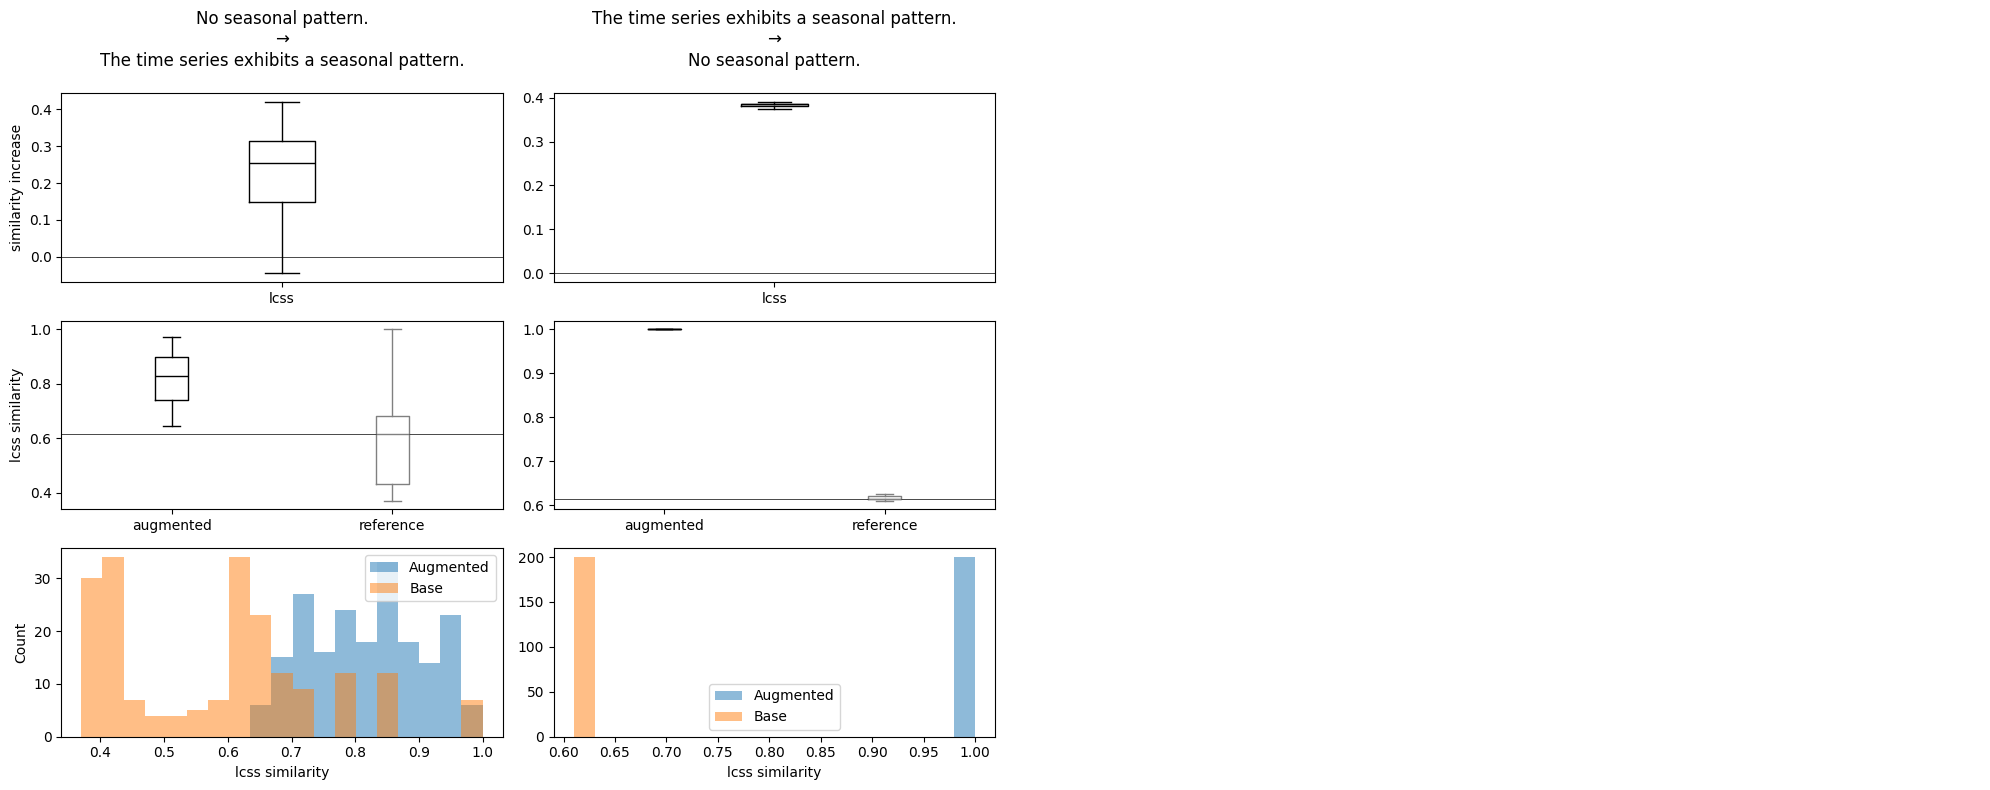

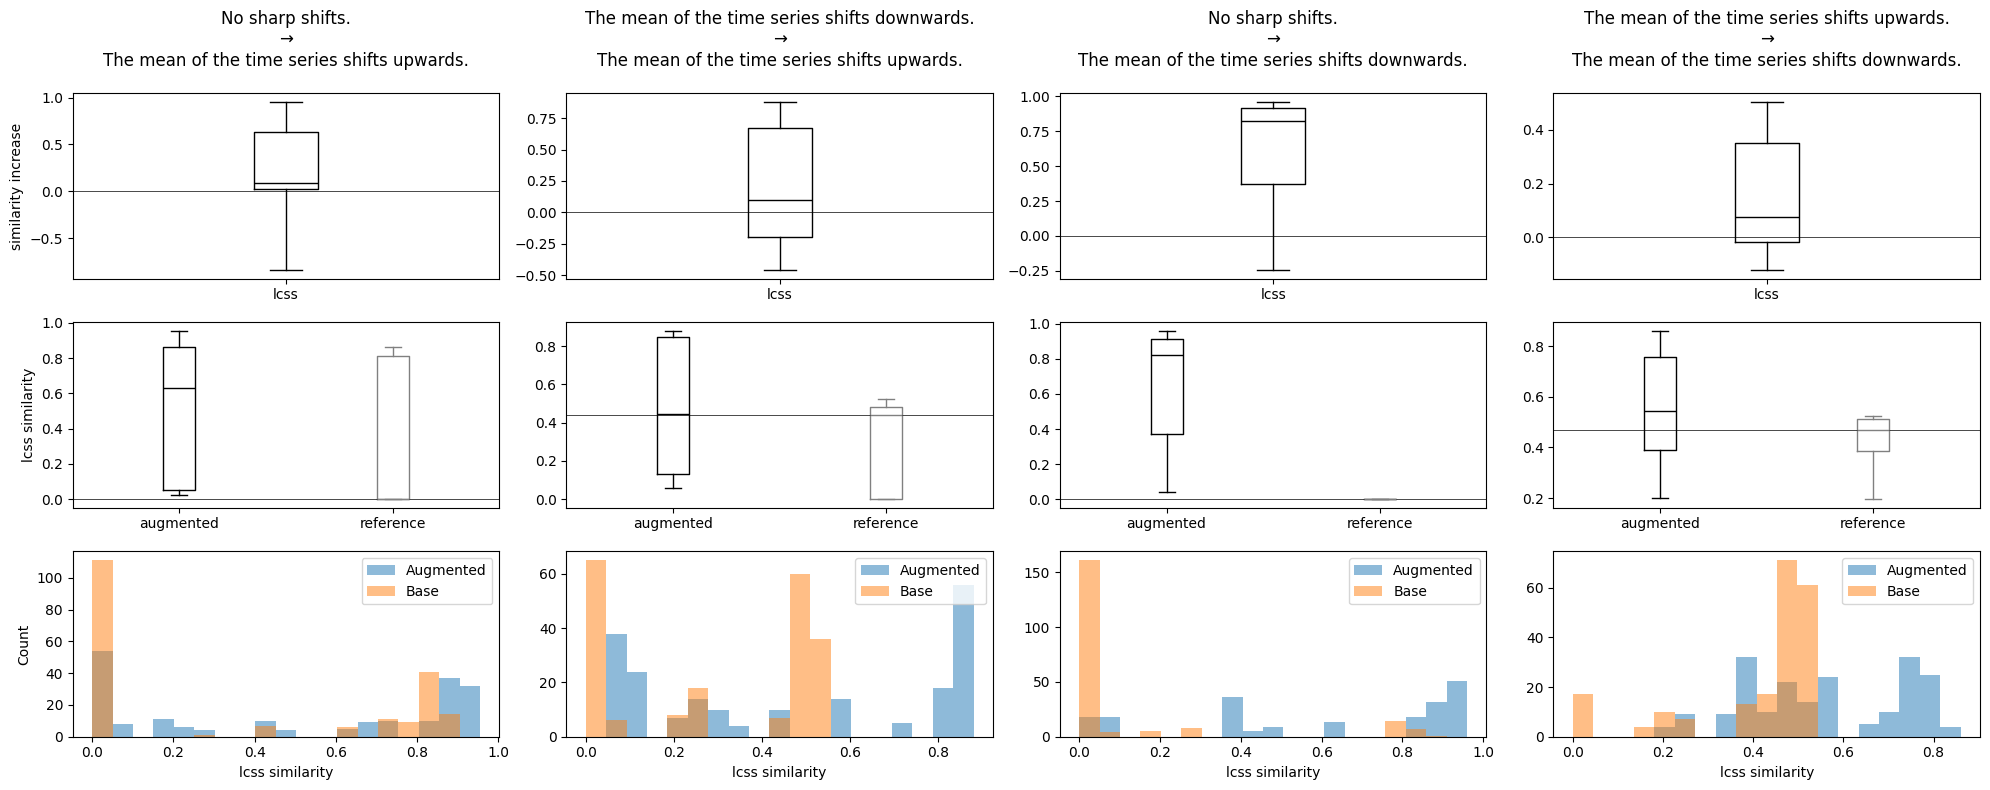

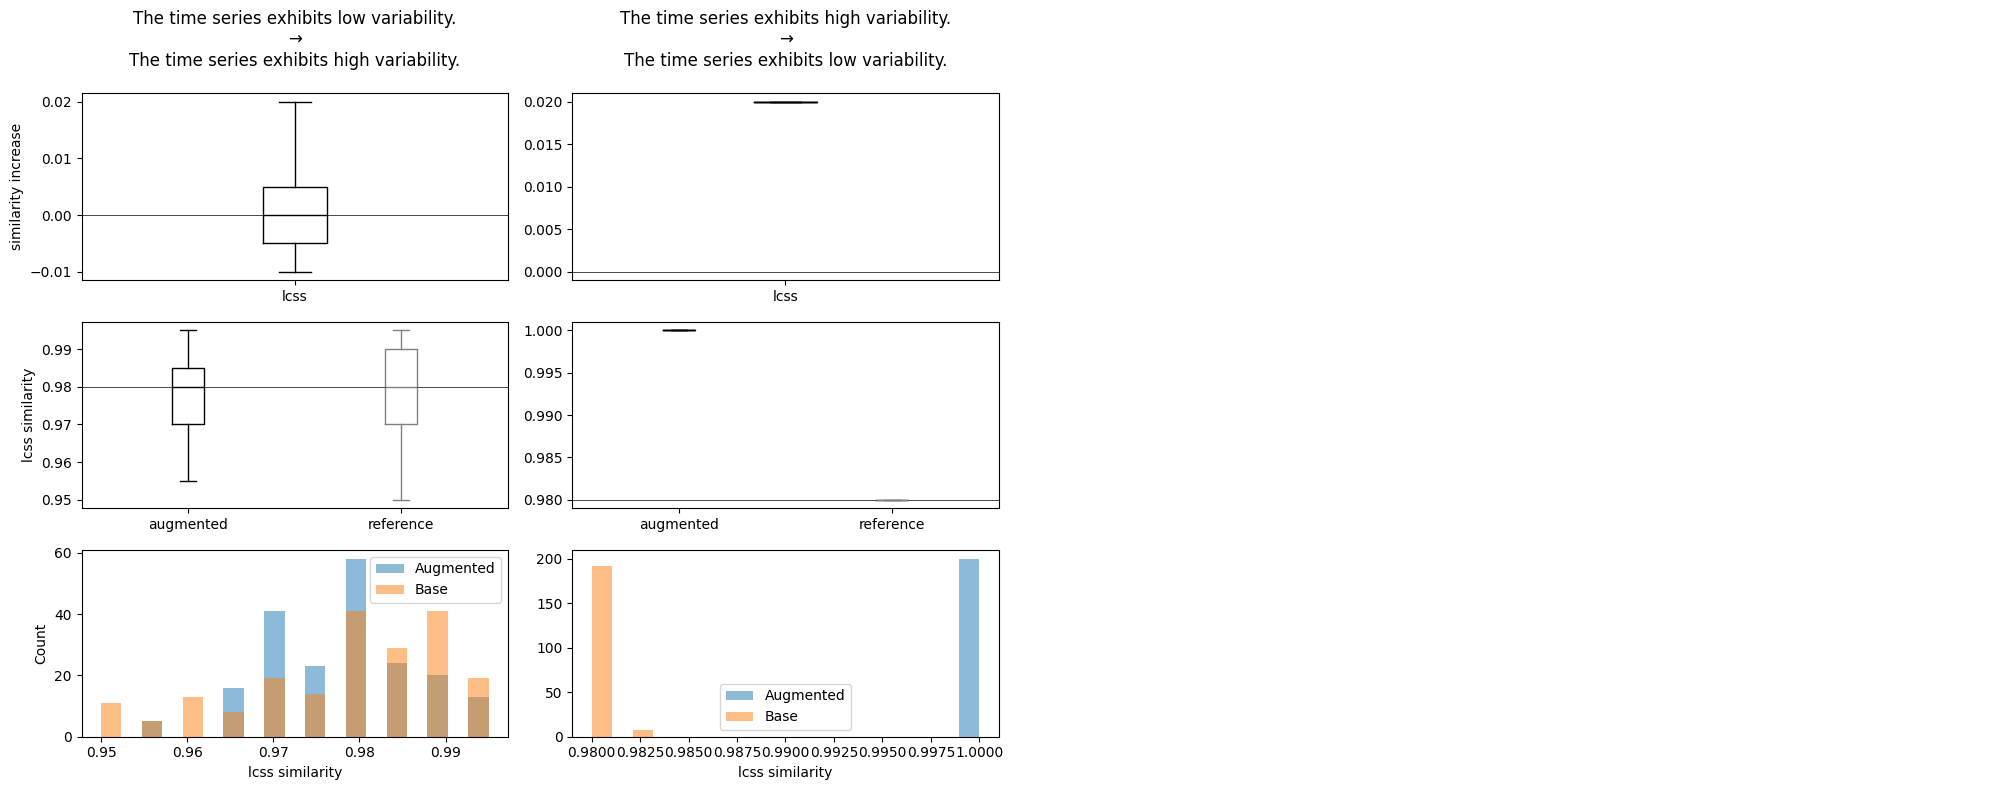

--------------------------------------------------------------------------------


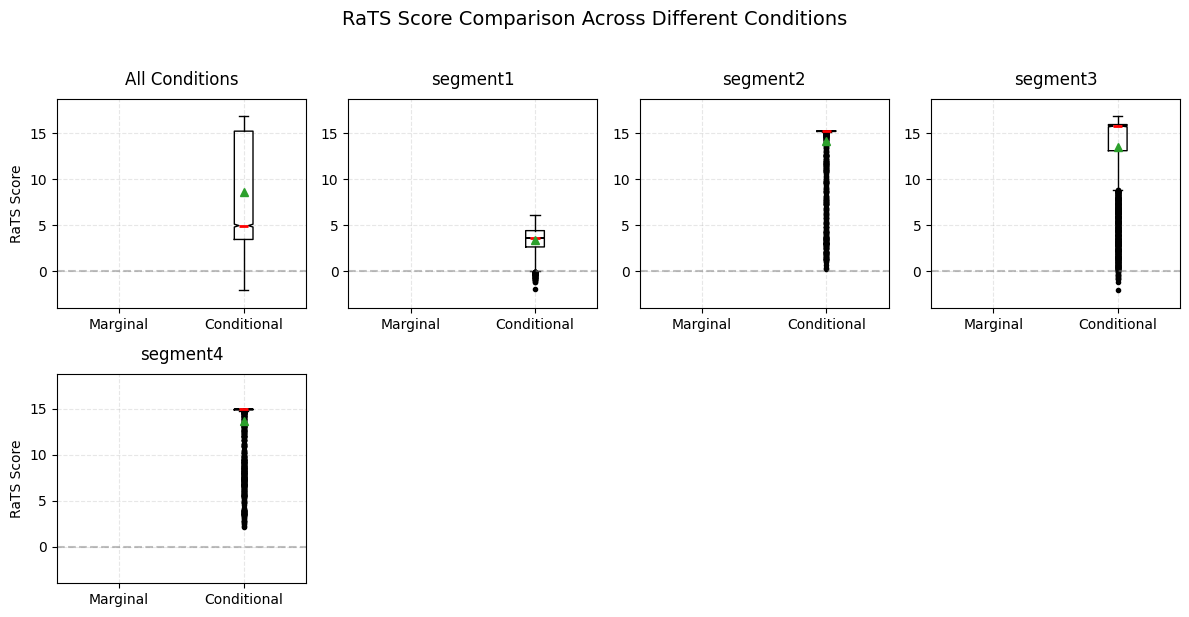

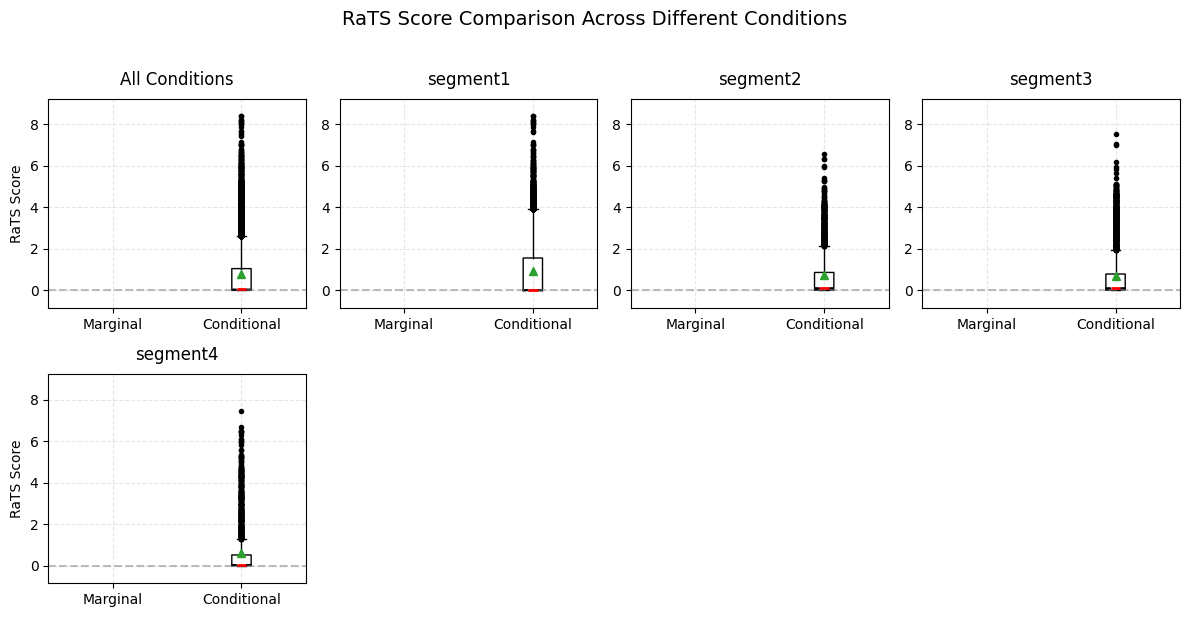

In [7]:
w = 0.7
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())

In [8]:
summarize_scores(df_all)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW distance decrease ↓,LCSS similarity increase ↑,RaTS ↑,|RaTS (preserved)|↓
final_score,2.05 (1.63),1.05 (0.51),-17.21 (14.94),0.30 (0.34),8.60 (5.86),0.81 (1.35)


In [9]:
summarize_scores(df_all, mean_sd=False)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW distance decrease ↓,LCSS similarity increase ↑,RaTS ↑,|RaTS (preserved)|↓
final_score,"1.68 [0.82, 2.90]","1.03 [0.68, 1.38]","-14.39 [-26.06, -5.09]","0.34 [0.02, 0.56]","4.96 [3.46, 15.24]","0.04 [0.00, 1.05]"


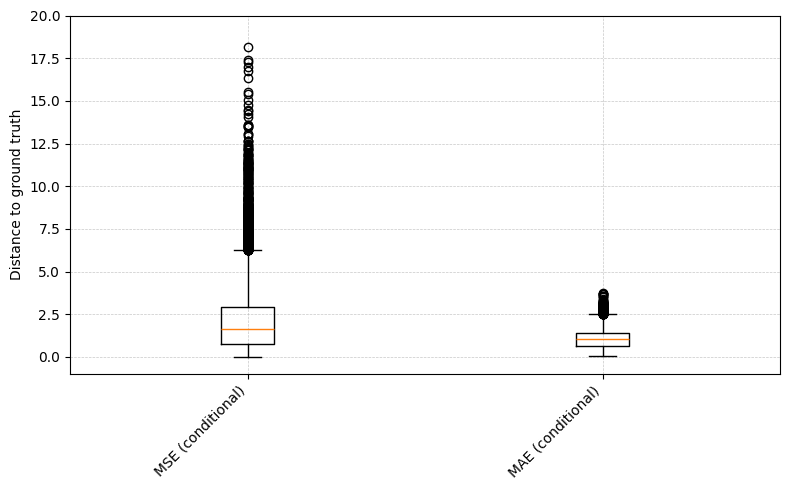

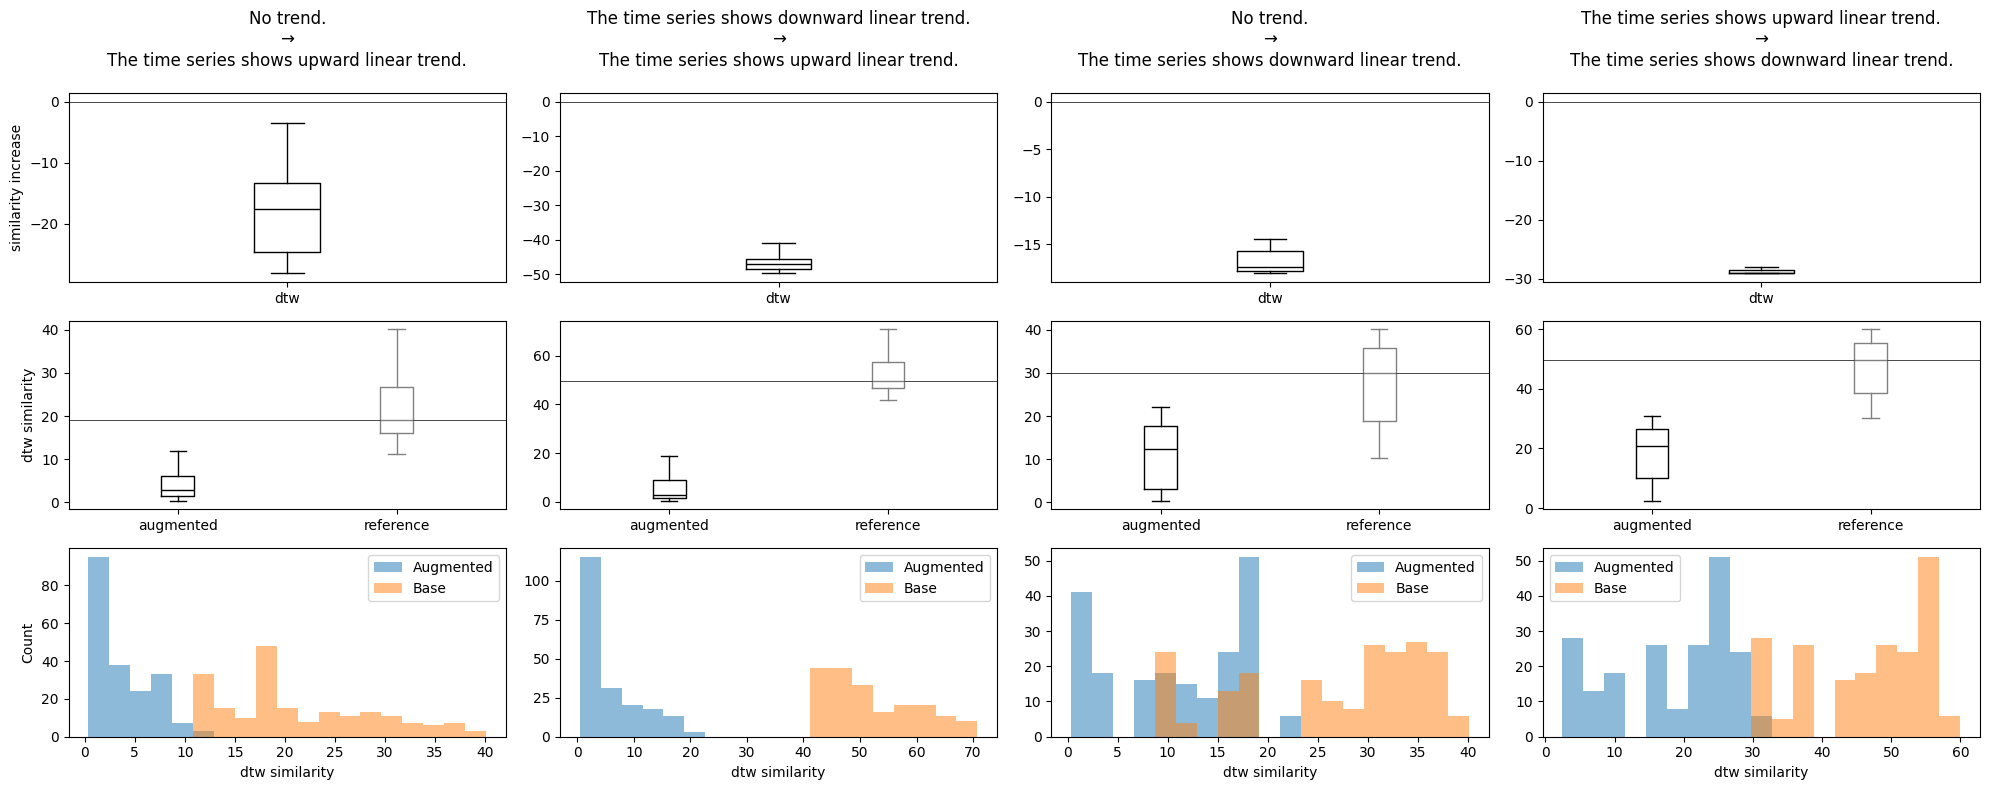

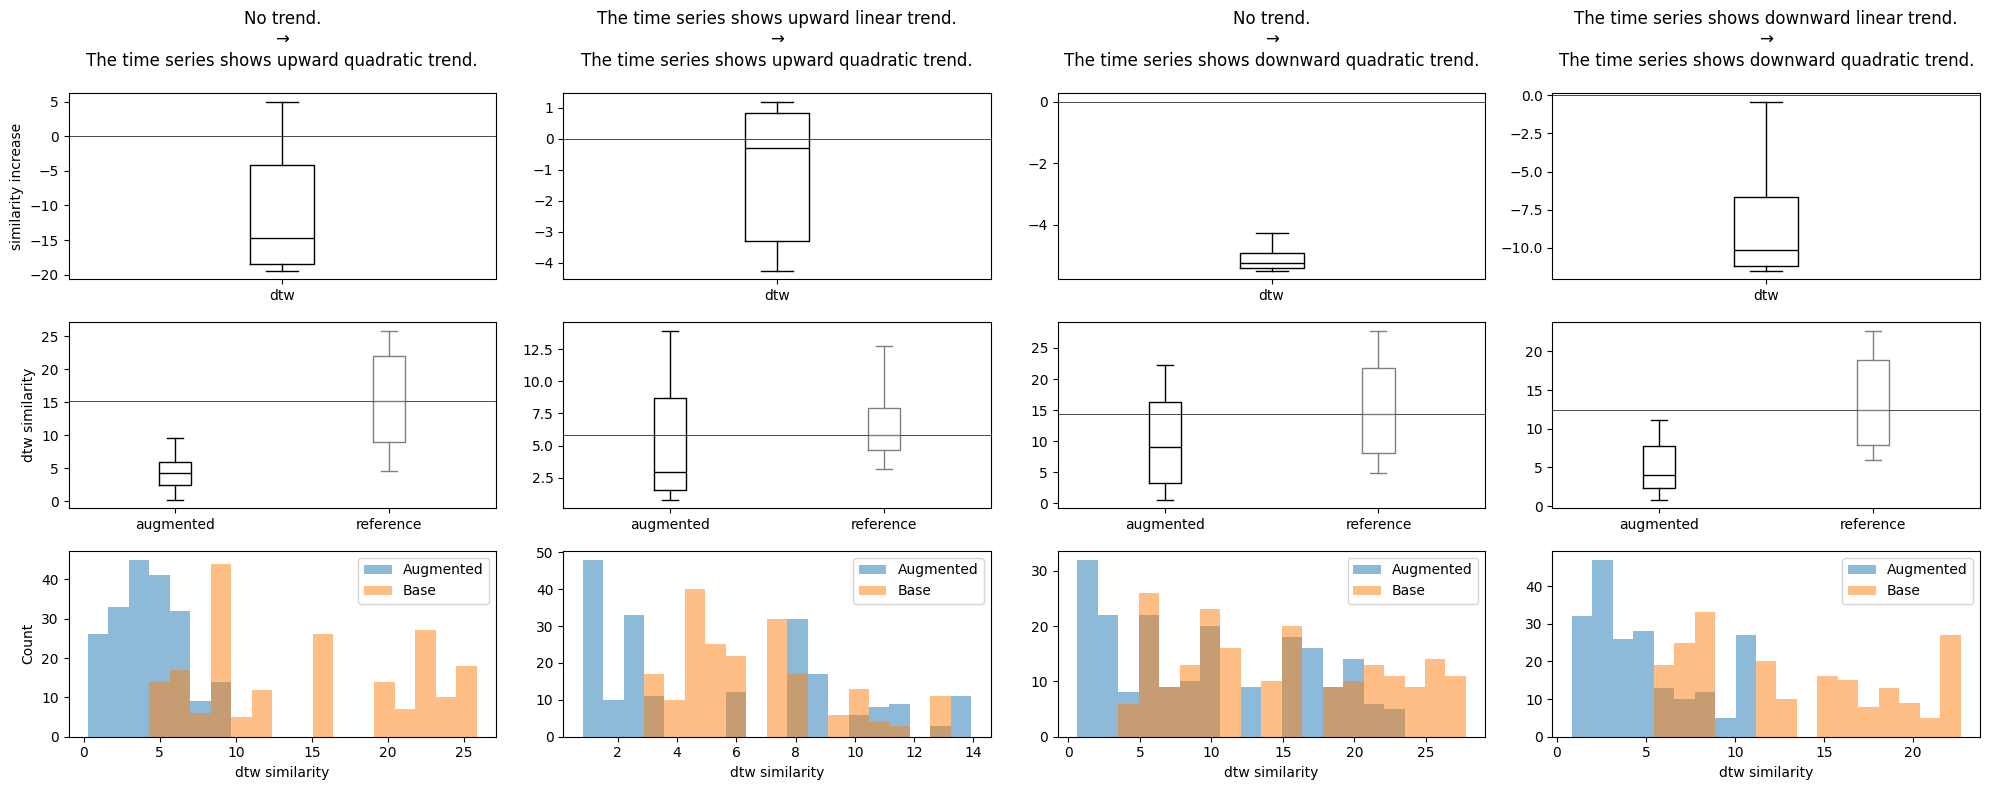

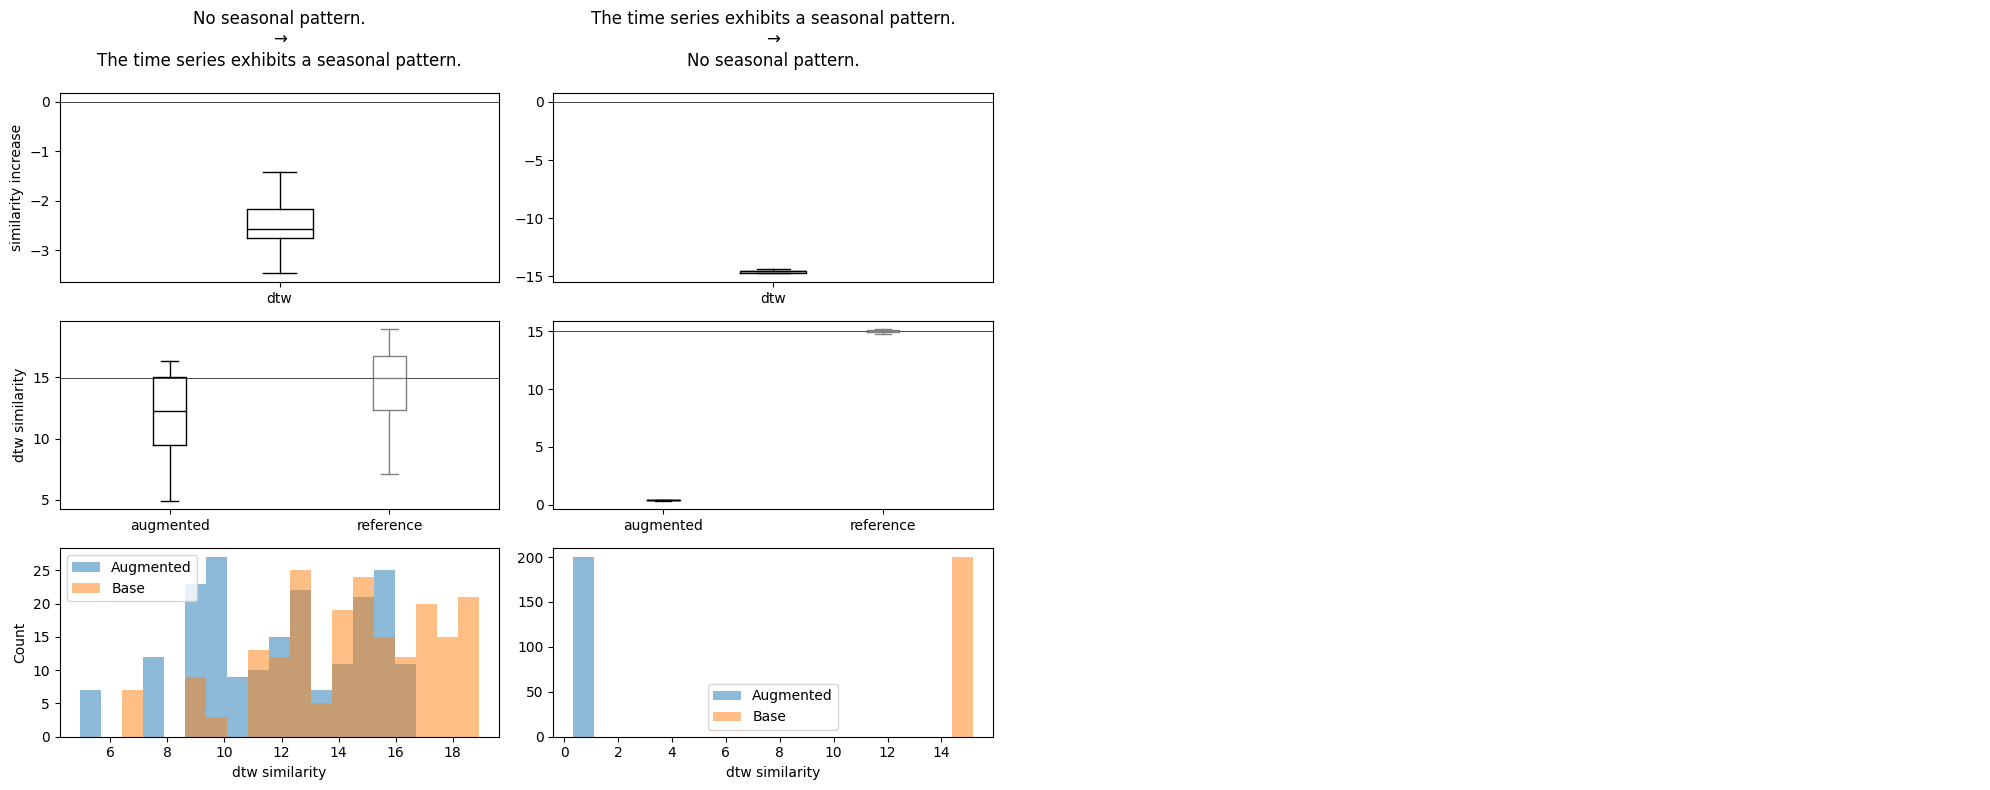

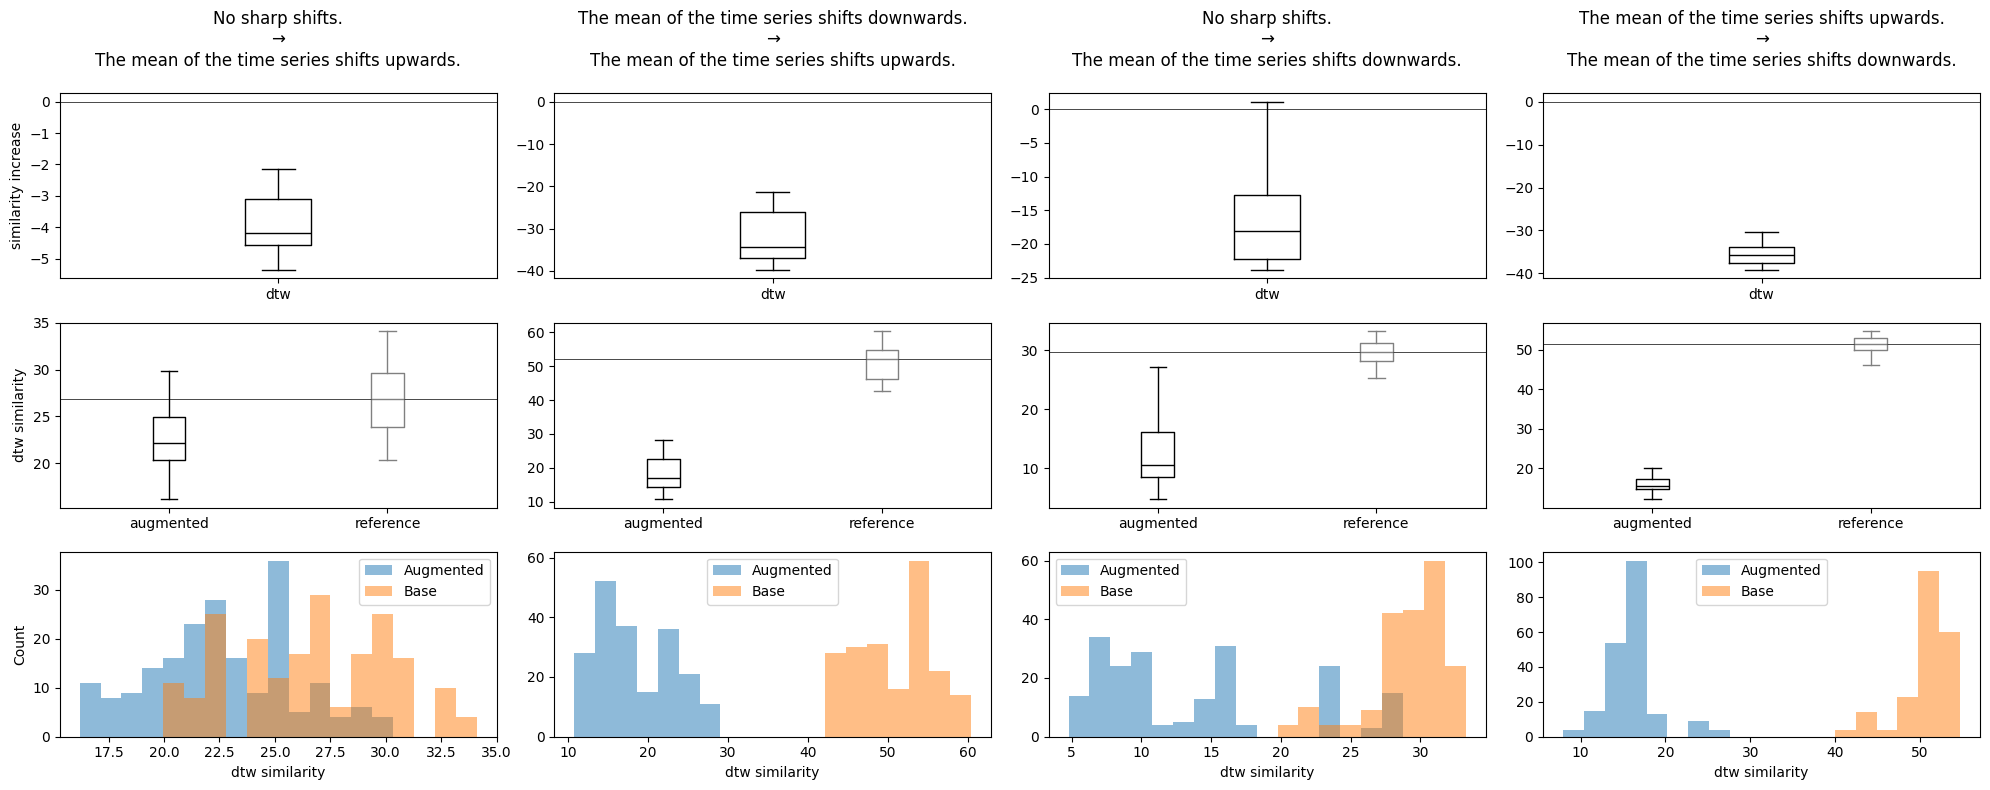

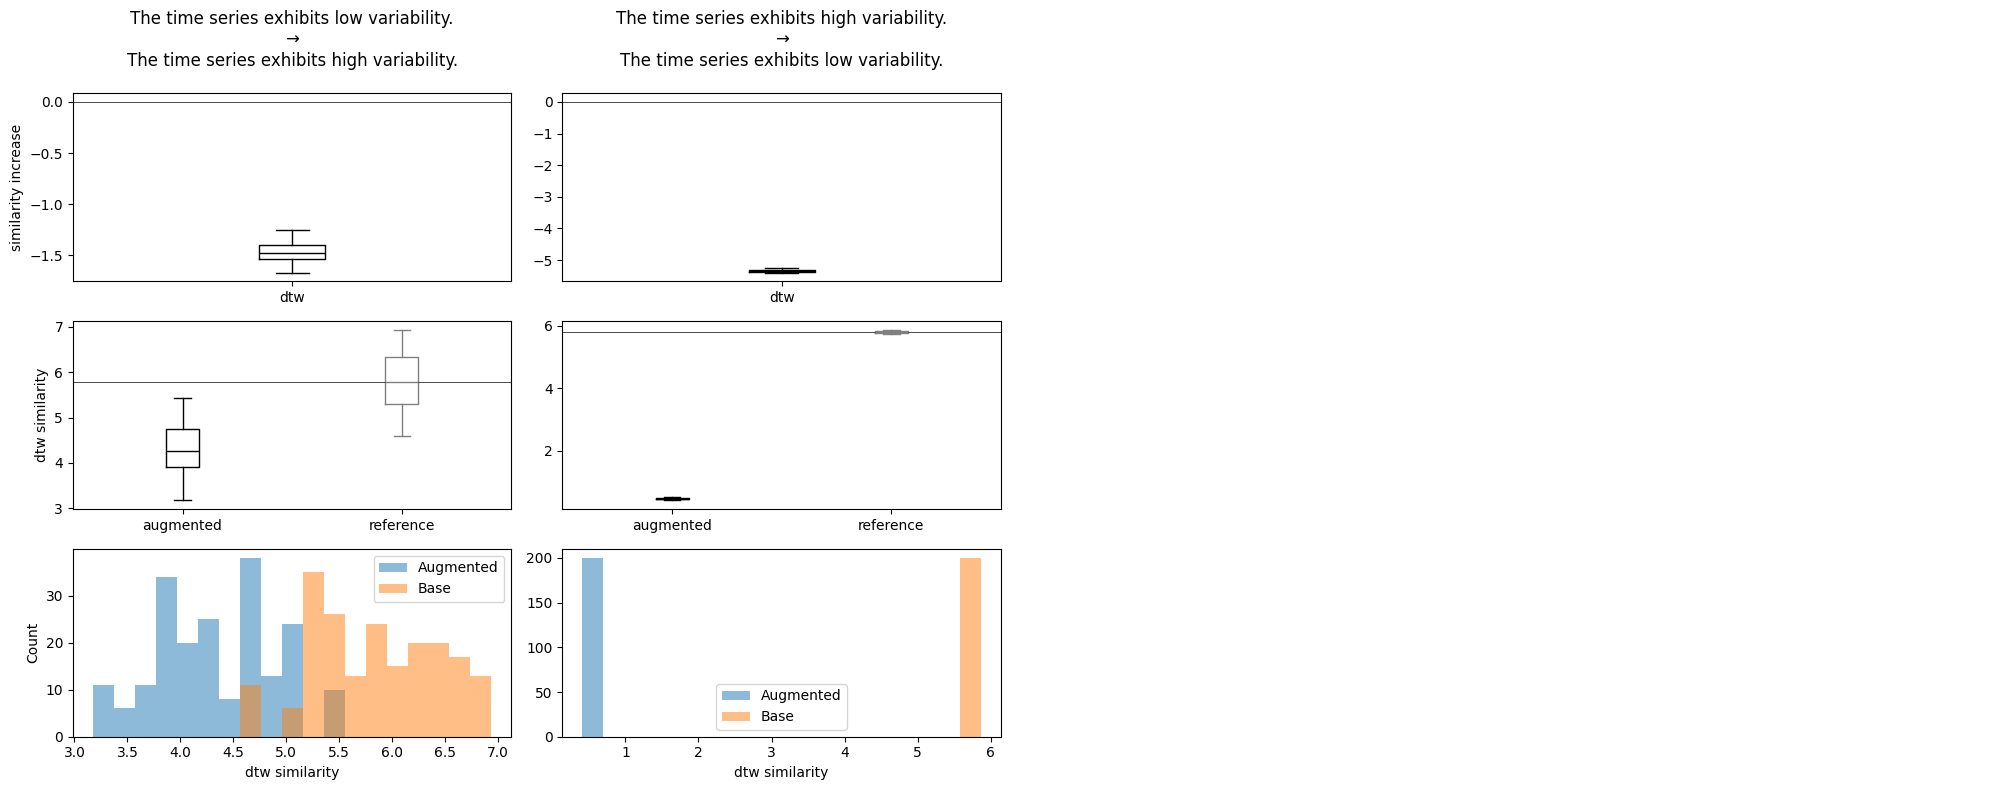

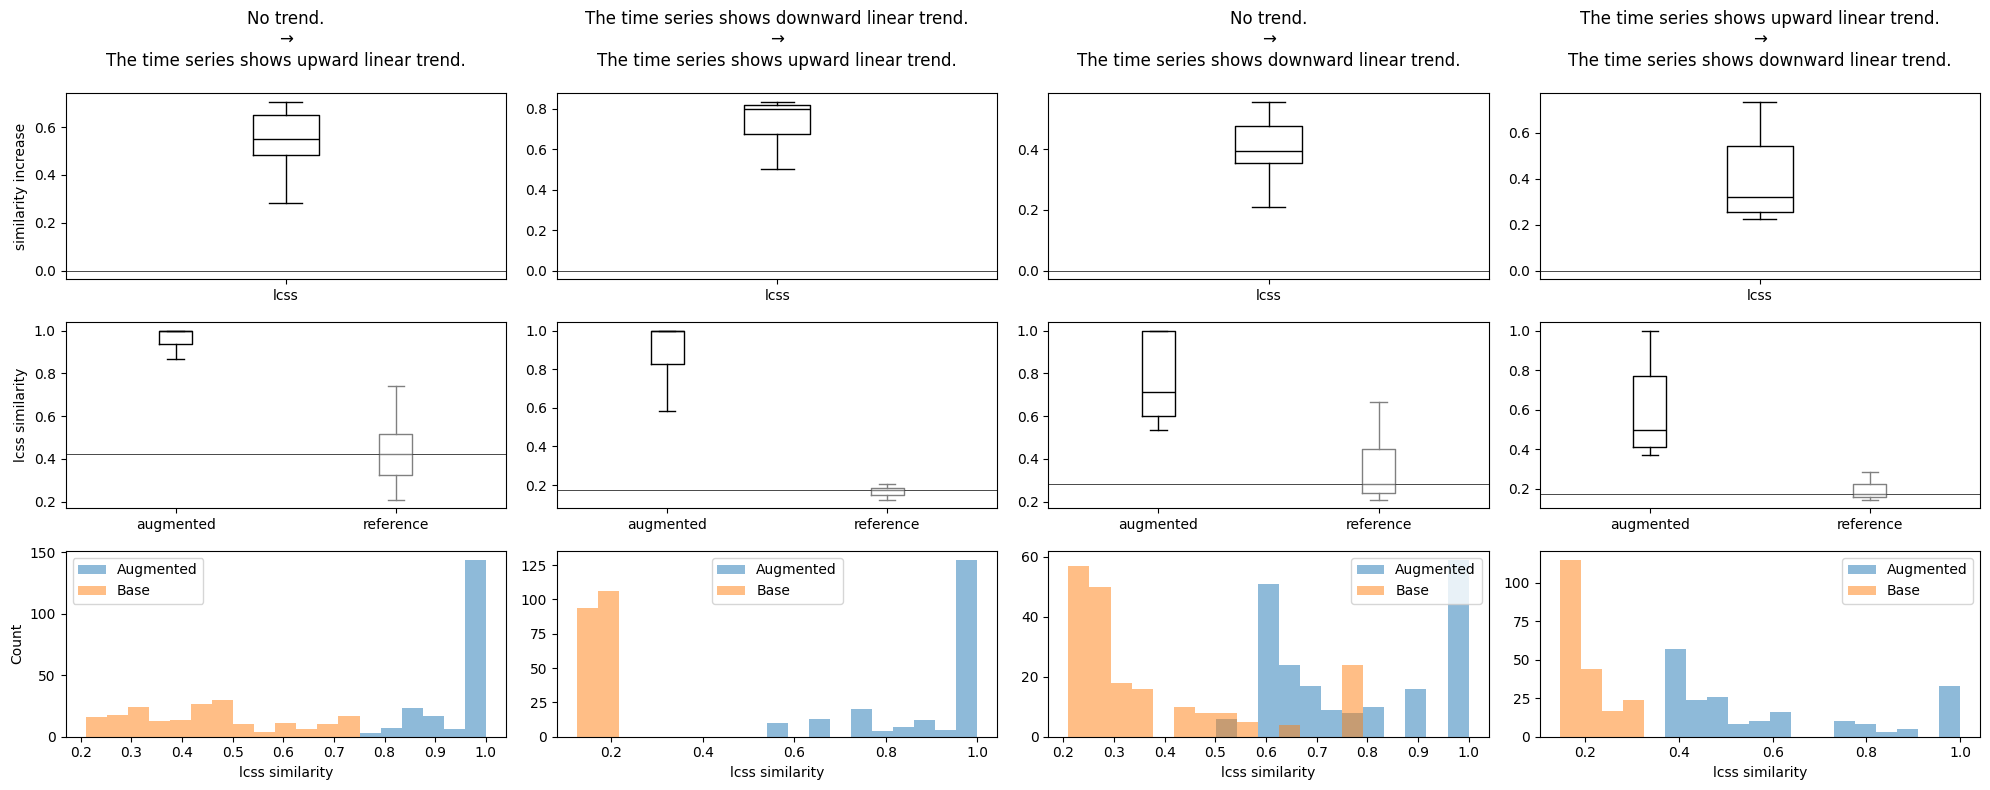

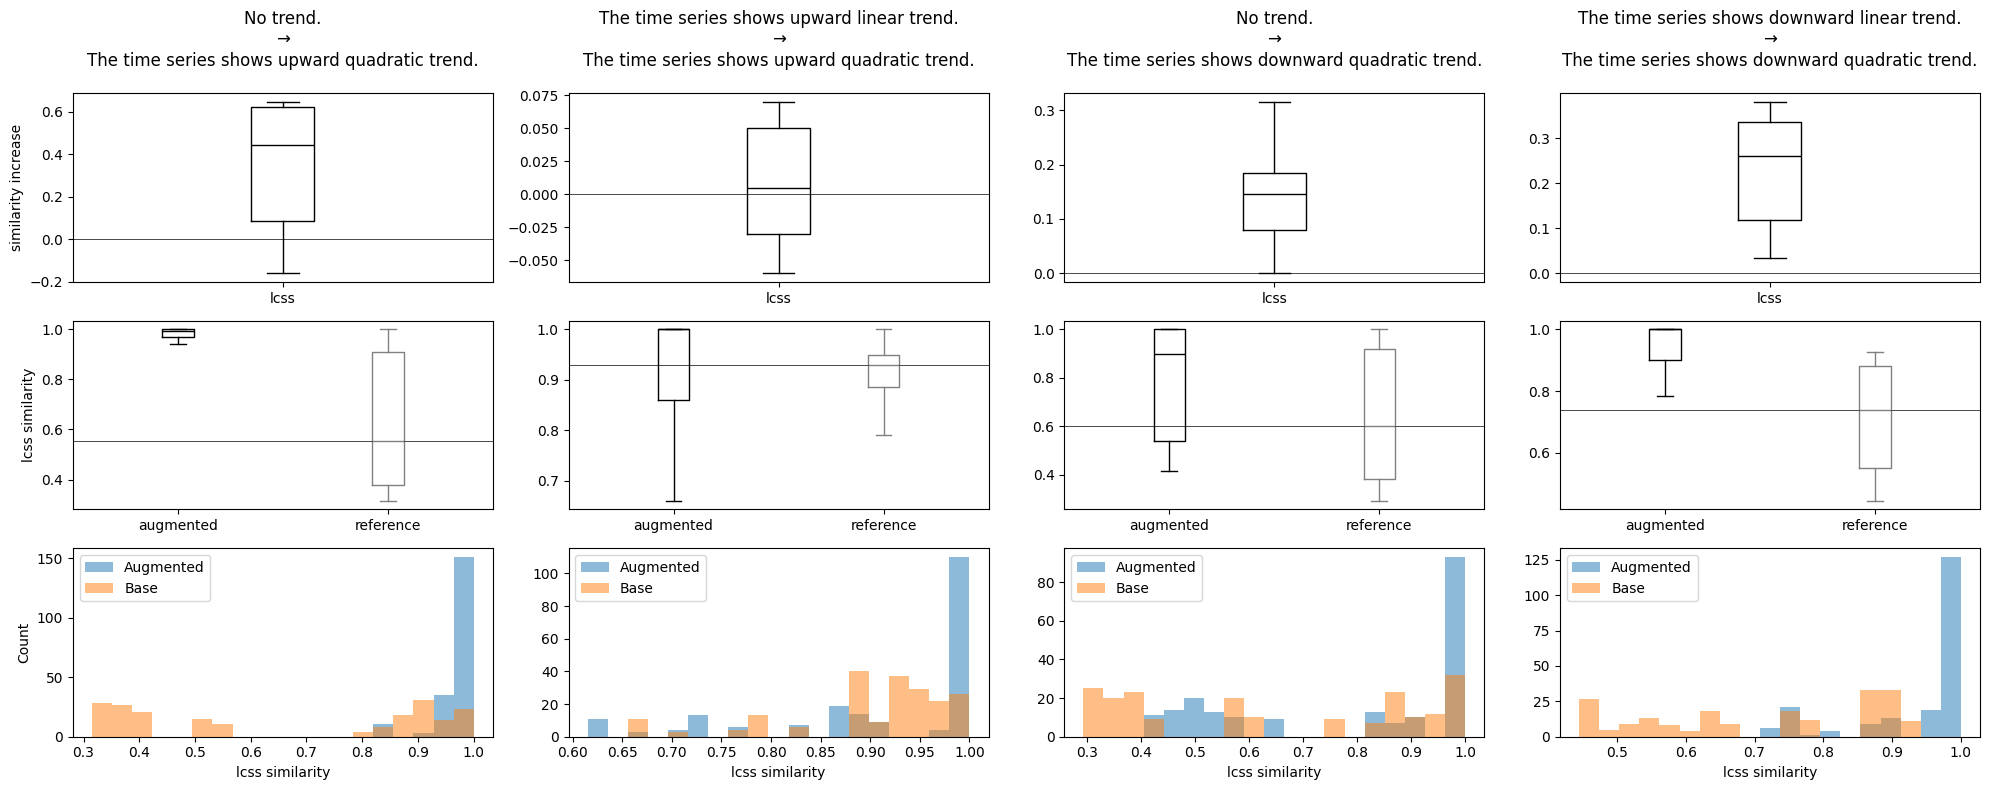

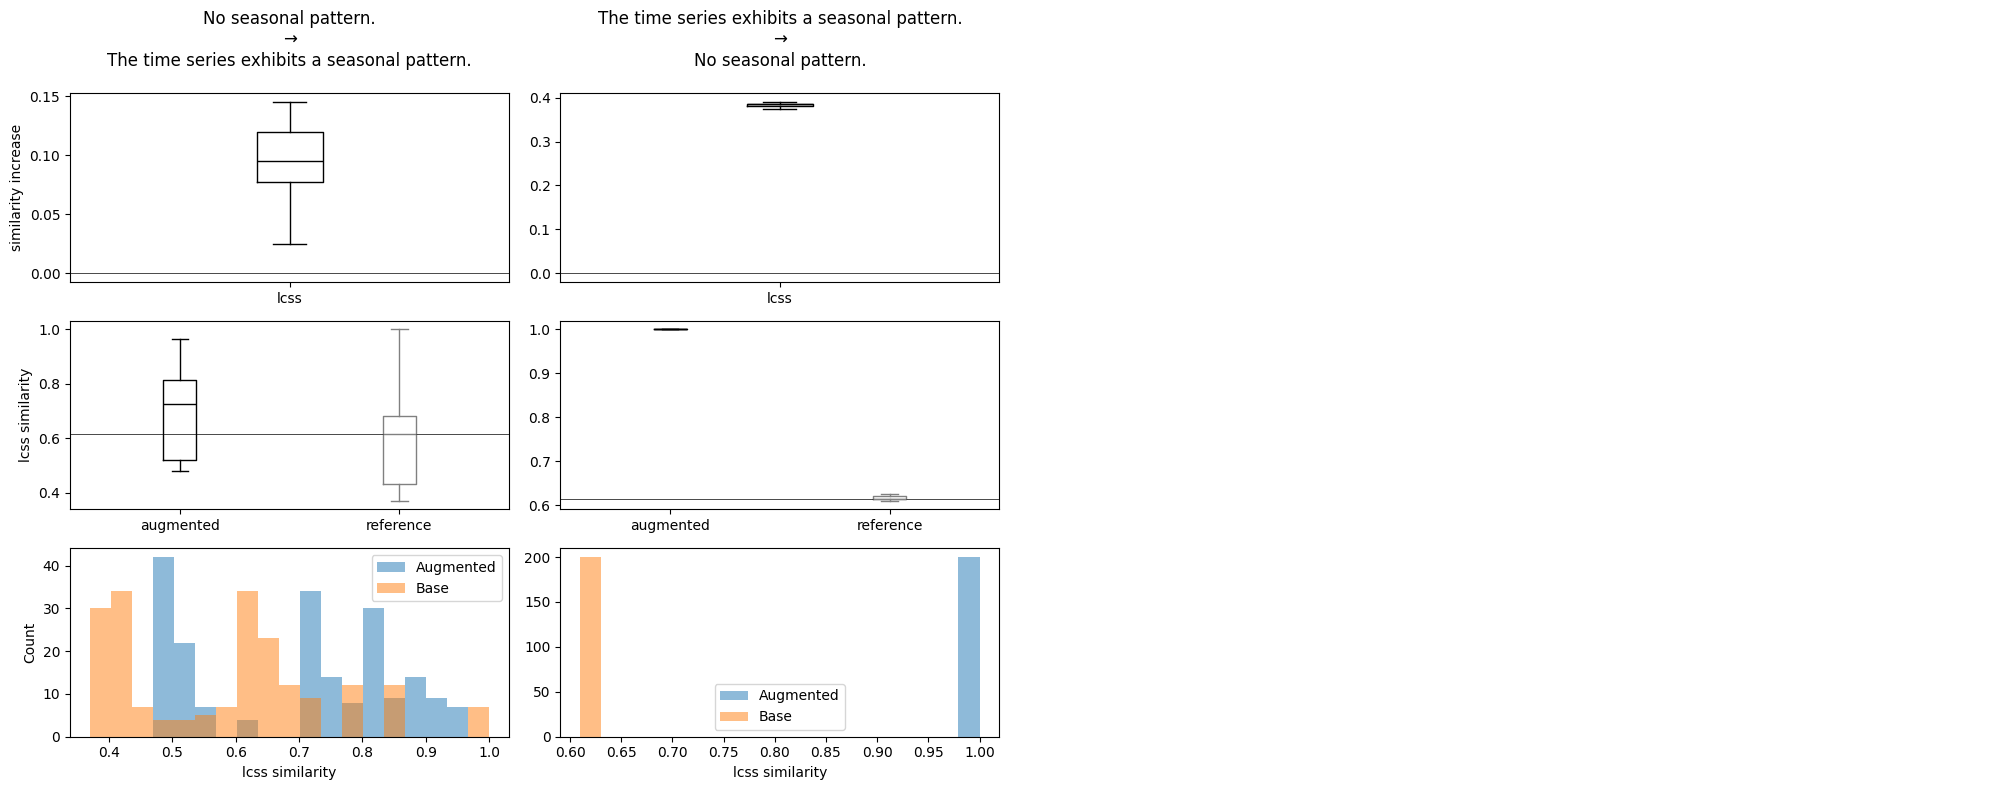

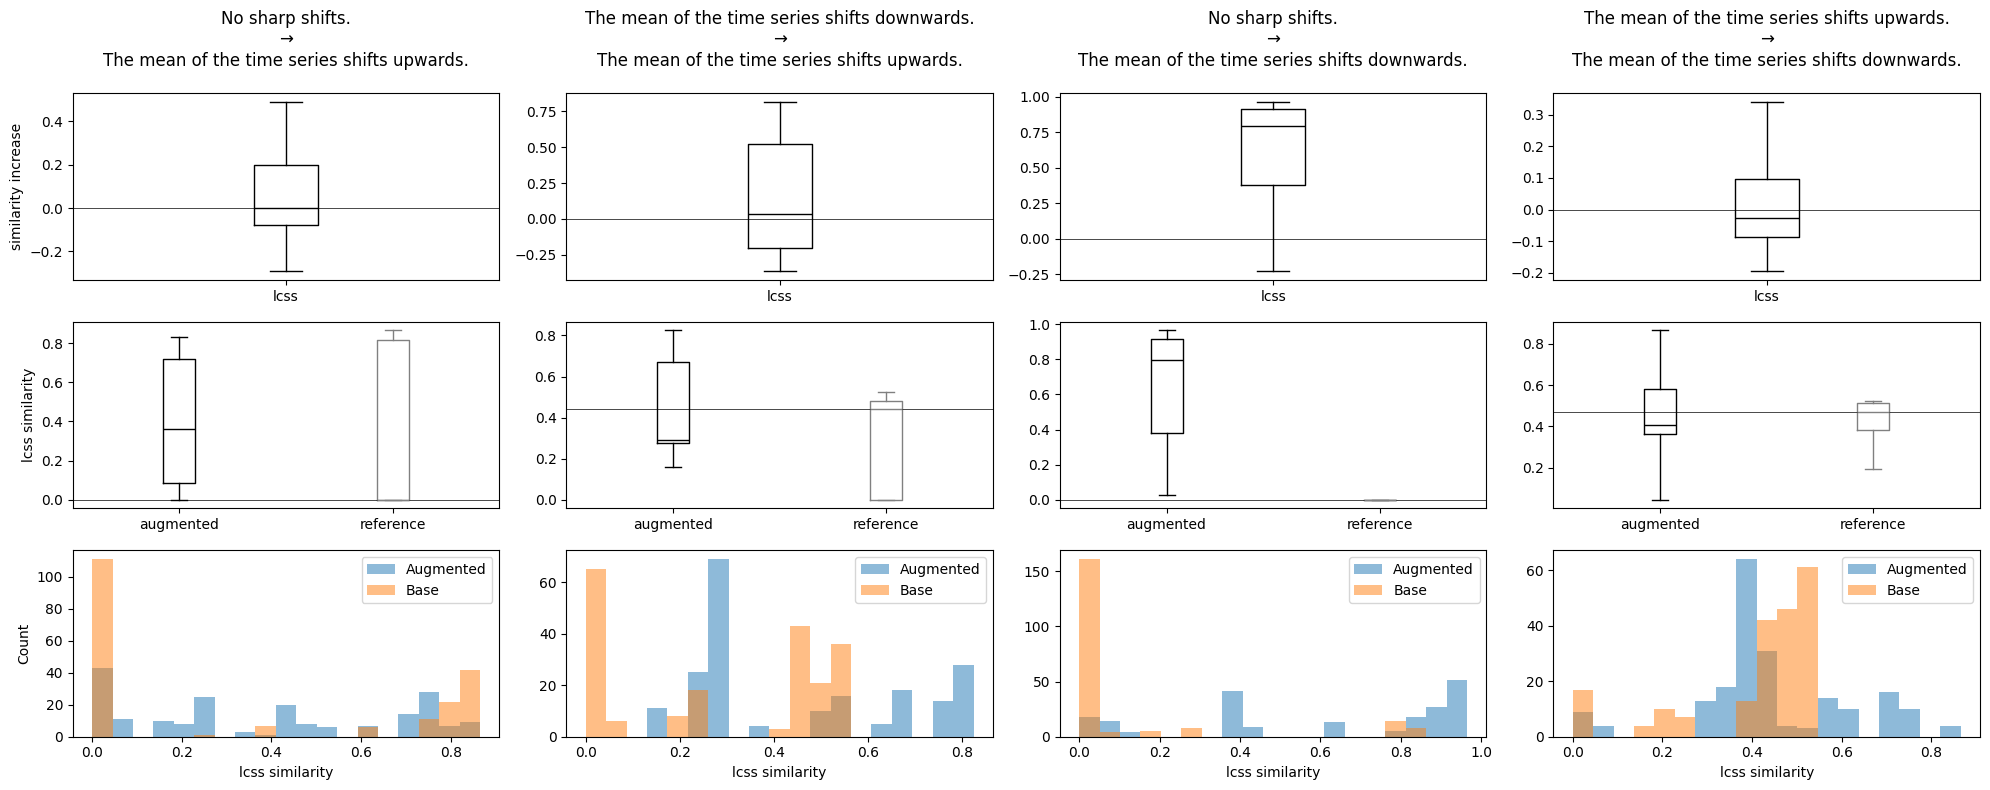

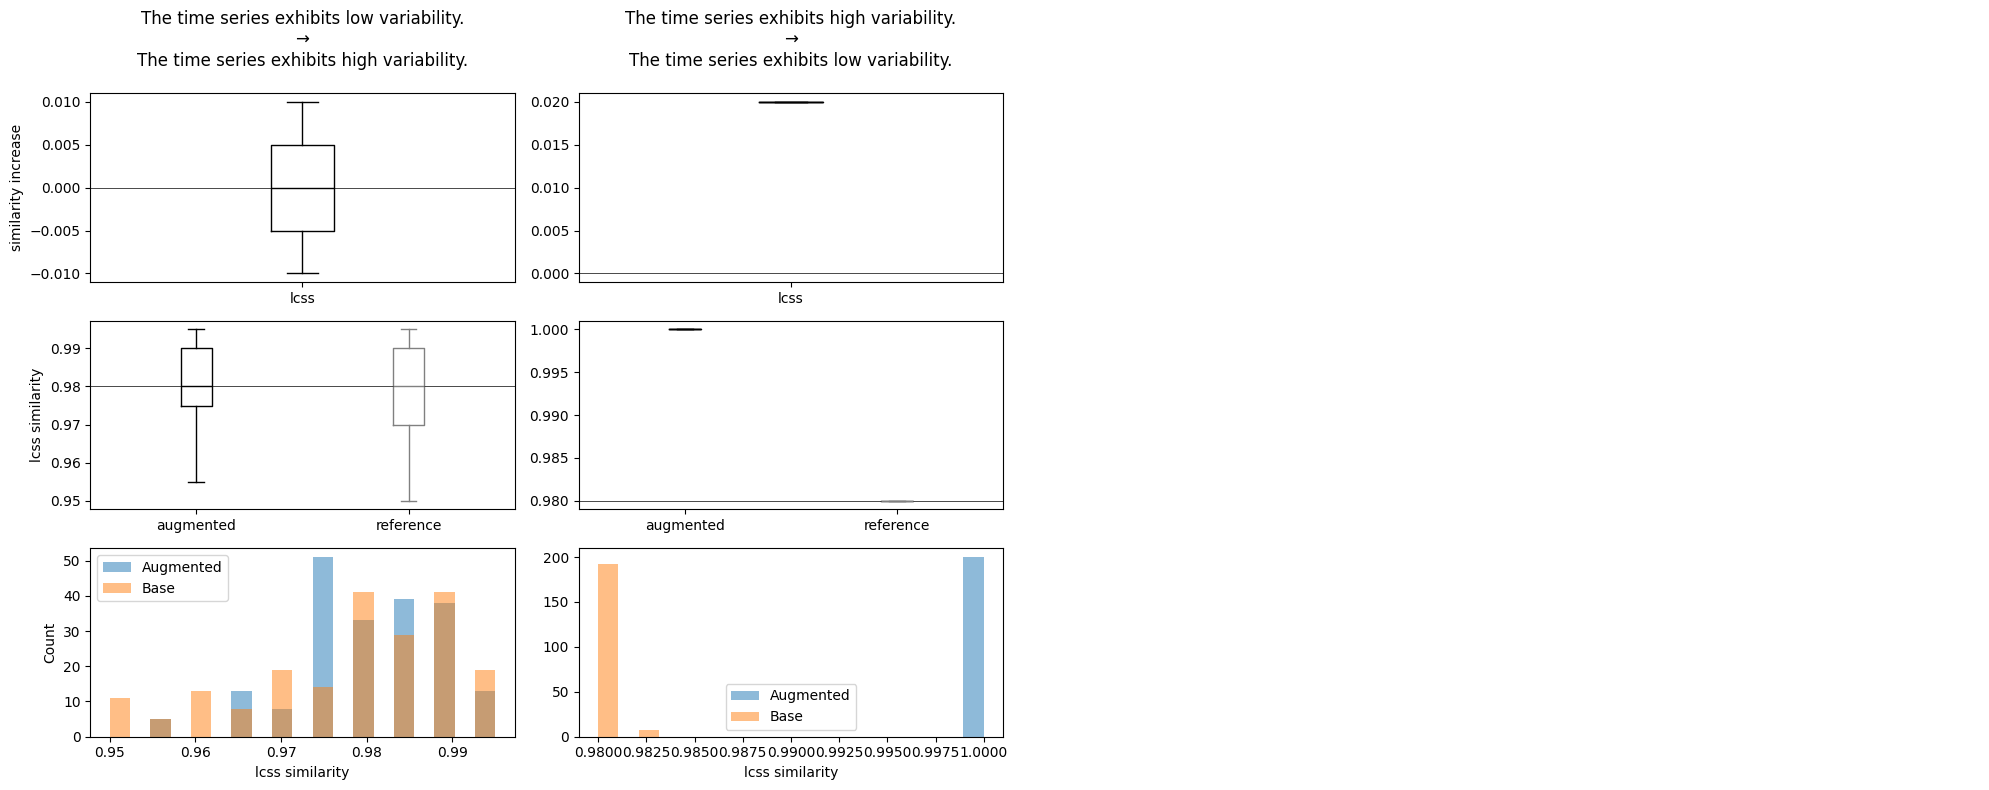

--------------------------------------------------------------------------------


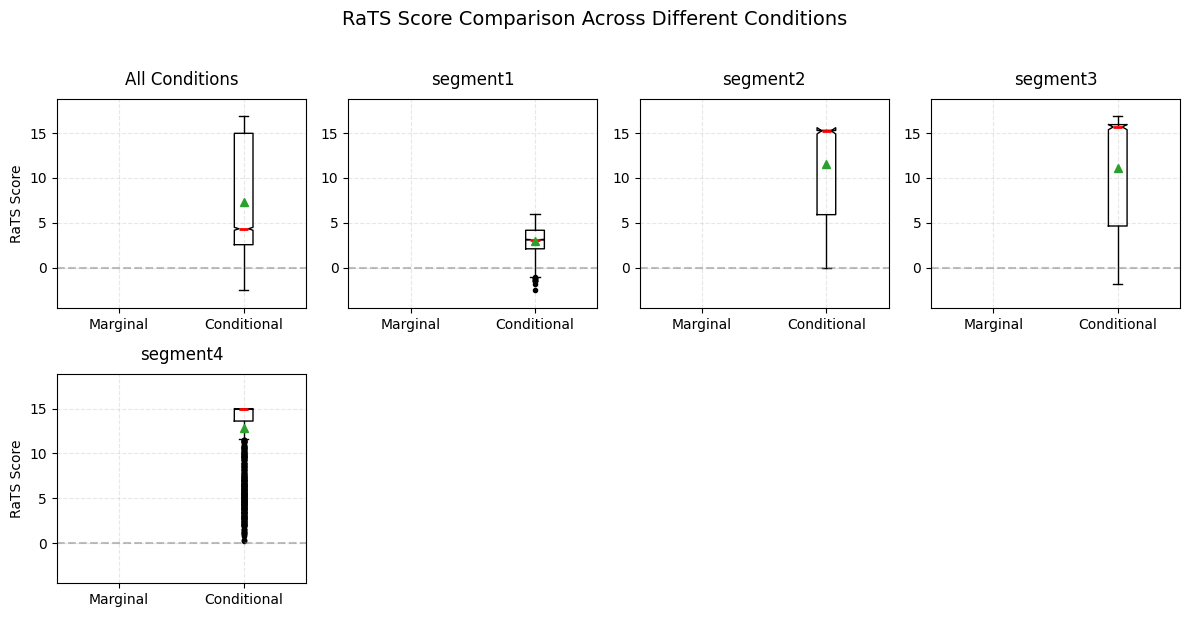

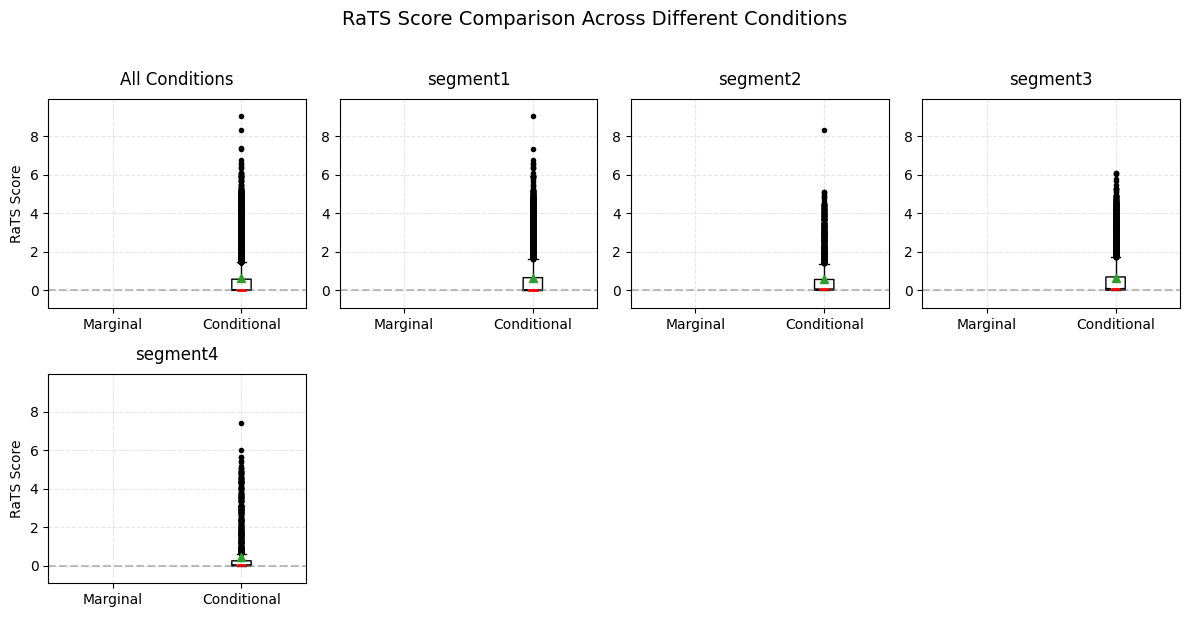

In [10]:
w = 0.6
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())


In [11]:
summarize_scores(df_all)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW distance decrease ↓,LCSS similarity increase ↑,RaTS ↑,|RaTS (preserved)|↓
final_score,2.12 (1.91),1.06 (0.55),-15.28 (13.85),0.25 (0.30),7.33 (6.02),0.63 (1.19)


In [12]:
summarize_scores(df_all, mean_sd=False)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW distance decrease ↓,LCSS similarity increase ↑,RaTS ↑,|RaTS (preserved)|↓
final_score,"1.64 [0.75, 2.94]","1.02 [0.65, 1.39]","-11.48 [-25.18, -4.12]","0.20 [0.02, 0.43]","4.36 [2.59, 14.96]","0.02 [0.00, 0.58]"
